In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [119]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [121]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [122]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [123]:
# Eksik değerlerin analizi
missing_values = df.isnull().sum()
print("Eksik değerlerin sayısı:")
print(missing_values[missing_values > 0])

missing_percentage = (missing_values / len(df)) * 100
print("\nEksik değerlerin yüzdesi:")
print(missing_percentage[missing_percentage > 0])


Eksik değerlerin sayısı:
children         4
country        488
agent        16340
company     112593
dtype: int64

Eksik değerlerin yüzdesi:
children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [124]:
df['children'].fillna(df['children'].median(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

agent_distribution = df['agent'].value_counts()
print("Agent sütunundaki değerlerin dağılımı:")
print(agent_distribution)

df['agent'].fillna(0, inplace=True)

df.drop(columns=['company'], inplace=True)

print("Eksik değerlerin sayısı:")
print(df.isnull().sum())

print("\nTemizlenmiş veri setinin ilk birkaç satırı:")
print(df.head())

Agent sütunundaki değerlerin dağılımı:
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64
Eksik değerlerin sayısı:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assign

In [125]:
df.shape

(119390, 31)

In [126]:
zero_guests = list(df.loc[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)

In [127]:
df.shape

(119210, 31)

In [128]:
unique_counts = df.nunique()
print("Tüm sütunlar için unique değerlerin sayısı:")
print(unique_counts)

Tüm sütunlar için unique değerlerin sayısı:
hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              334
days_in_waiting_list

In [129]:
df['meal'].replace('Undefined', 'SC', inplace=True)
df['children'] = df['children'].astype(int)
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])
df_dropCanceled = df.drop(columns=['is_canceled'])
df = df.drop(columns=['reservation_status'])

In [130]:
df.shape

(119210, 30)

In [131]:
df.describe(include = 'object')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,119210,119210,119210,119210,119210,119210,119210,119210,119210
unique,2,4,177,8,5,9,11,3,4
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
freq,79163,92236,48961,56408,97750,85873,74020,104461,89476


#Veri Analizi

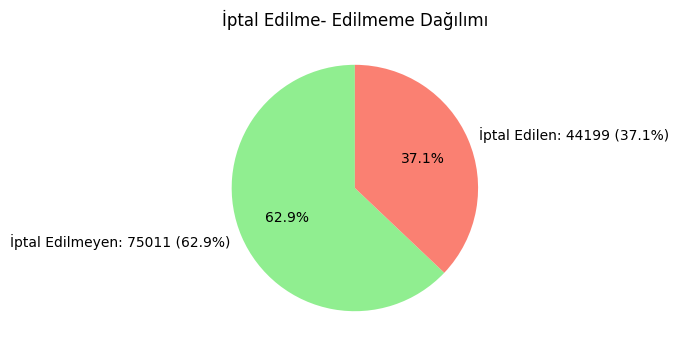

In [132]:
cancellation_counts = df['is_canceled'].value_counts()

cancellation_labels = ['İptal Edilmeyen', 'İptal Edilen']
cancellation_percentages = cancellation_counts / cancellation_counts.sum() * 100

cancellation_labels_full = [f'{label}: {count} ({percentage:.1f}%)' for label, count, percentage in zip(cancellation_labels, cancellation_counts, cancellation_percentages)]

plt.figure(figsize=(4, 4))
plt.pie(cancellation_counts, labels=cancellation_labels_full, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])

plt.title('İptal Edilme- Edilmeme Dağılımı')
plt.show()

<Figure size 1200x800 with 0 Axes>

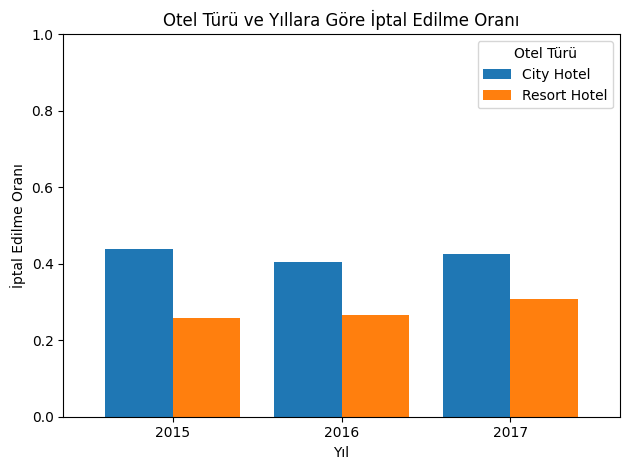

In [133]:
cancellation_rates = df.groupby(['arrival_date_year', 'hotel'])['is_canceled'].mean().unstack()

# Grafik ayarlarını yapma
plt.figure(figsize=(12, 8))
cancellation_rates.plot(kind='bar', width=0.8)

# Grafik başlığı ve etiketler
plt.title('Otel Türü ve Yıllara Göre İptal Edilme Oranı')
plt.xlabel('Yıl')
plt.ylabel('İptal Edilme Oranı')
plt.xticks(rotation=0)  # Yıl etiketlerini yatay hizalamak için
plt.legend(title='Otel Türü')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırlama
# Grafiği gösterme
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

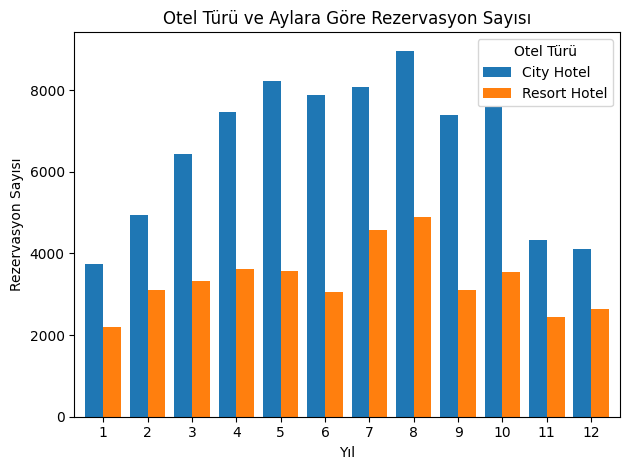

In [134]:
reservation_rates = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().unstack()

# Grafik ayarlarını yapma
plt.figure(figsize=(15, 10))
reservation_rates.plot(kind='bar', width=0.8)

# Grafik başlığı ve etiketler
plt.title('Otel Türü ve Aylara Göre Rezervasyon Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Rezervasyon Sayısı')
plt.xticks(rotation=0)  # Yıl etiketlerini yatay hizalamak için
plt.legend(title='Otel Türü')
# Grafiği gösterme
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

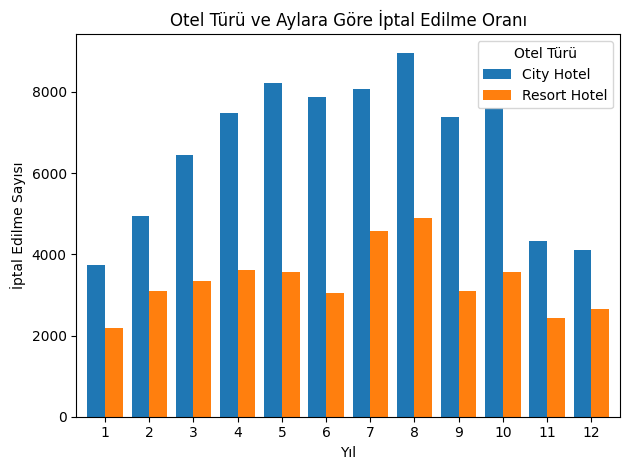

In [135]:
cancellation_rates = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].count().unstack()

# Grafik ayarlarını yapma
plt.figure(figsize=(15, 10))
cancellation_rates.plot(kind='bar', width=0.8)

# Grafik başlığı ve etiketler
plt.title('Otel Türü ve Aylara Göre İptal Edilme Oranı')
plt.xlabel('Yıl')
plt.ylabel('İptal Edilme Sayısı')
plt.xticks(rotation=0)  # Yıl etiketlerini yatay hizalamak için
plt.legend(title='Otel Türü')
# Grafiği gösterme
plt.tight_layout()
plt.show()

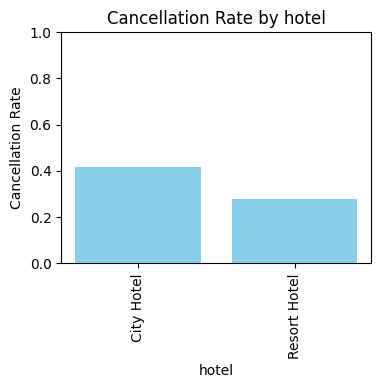

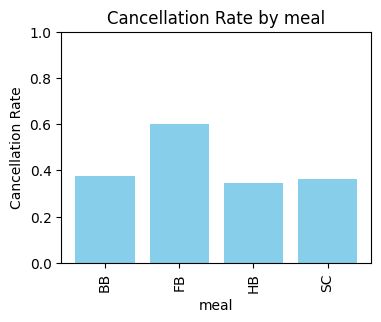

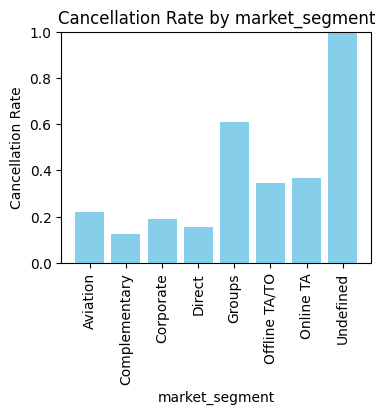

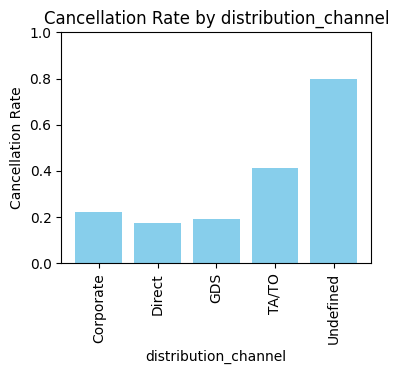

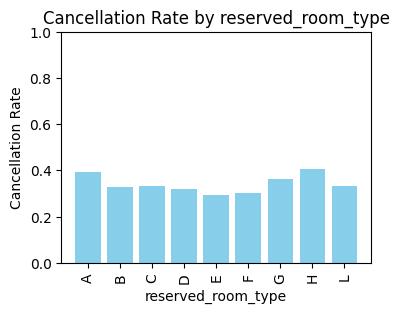

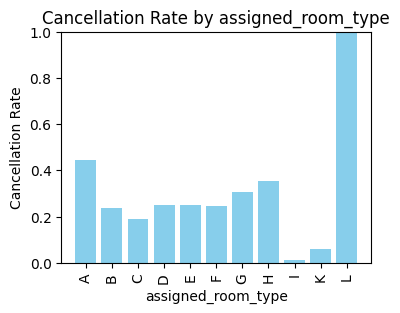

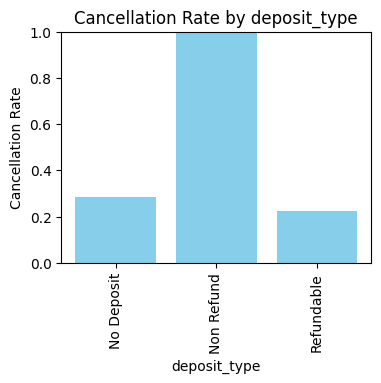

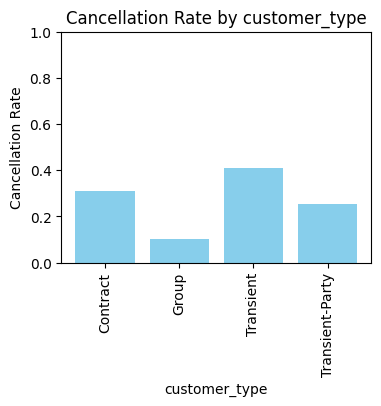

In [136]:
sayısalOlmayan_features = [
    'hotel',
    'meal',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type'
]


# Her sayısal olmayan öznitelik için iptal oranlarını hesaplayıp grafik çizme
for feature in sayısalOlmayan_features:
    # İptal oranını hesaplama
    feature_cancellation_rate = df.groupby(feature)['is_canceled'].mean()

    # DataFrame olarak düzenleme
    feature_cancellation_df = feature_cancellation_rate.reset_index()
    feature_cancellation_df.columns = [feature, 'cancellation_rate']

    # Grafik boyutlarını ayarlama
    plt.figure(figsize=(4, 3))  # Boyutları küçültme

    # Bar grafiği çizme
    plt.bar(feature_cancellation_df[feature], feature_cancellation_df['cancellation_rate'], color='skyblue')

    # Grafik başlığı ve etiketler
    plt.title(f'Cancellation Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Cancellation Rate')

    # Y eksenini 0 ile 1 arasında sınırlama
    plt.ylim(0, 1)

    # X eksenindeki etiketlerin döndürülmesi
    plt.xticks(rotation=90)

    # Grafiği gösterme
    plt.show()

Mevsimellik Etkisini Gözlemleme

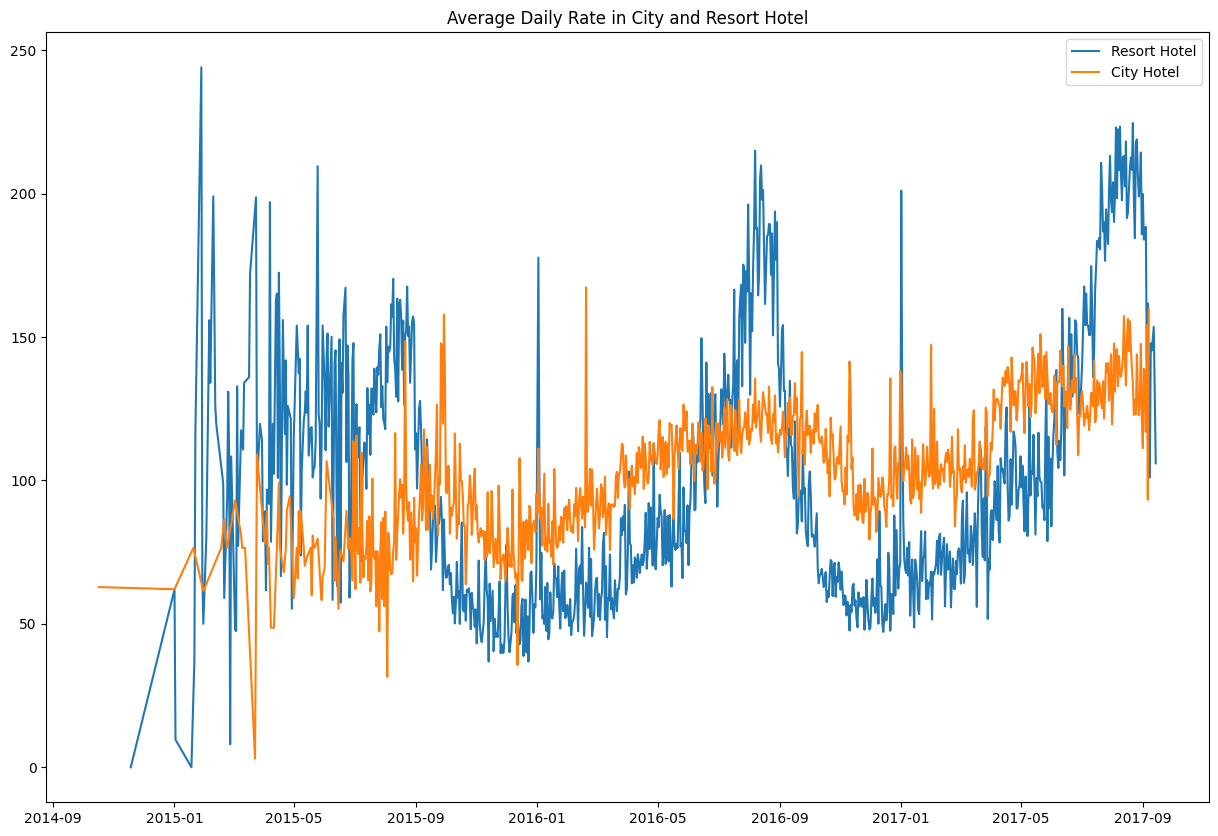

In [137]:
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)
City_Hotel = df[df['hotel']== 'City Hotel']
City_Hotel['is_canceled'].value_counts(normalize =True)
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotel = City_Hotel.groupby('reservation_status_date')[['adr']].mean()
plt.figure(figsize=(15,10))
plt.title('Average Daily Rate in City and Resort Hotel')
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(City_Hotel.index,City_Hotel['adr'],label = 'City Hotel')
plt.legend()
plt.show()

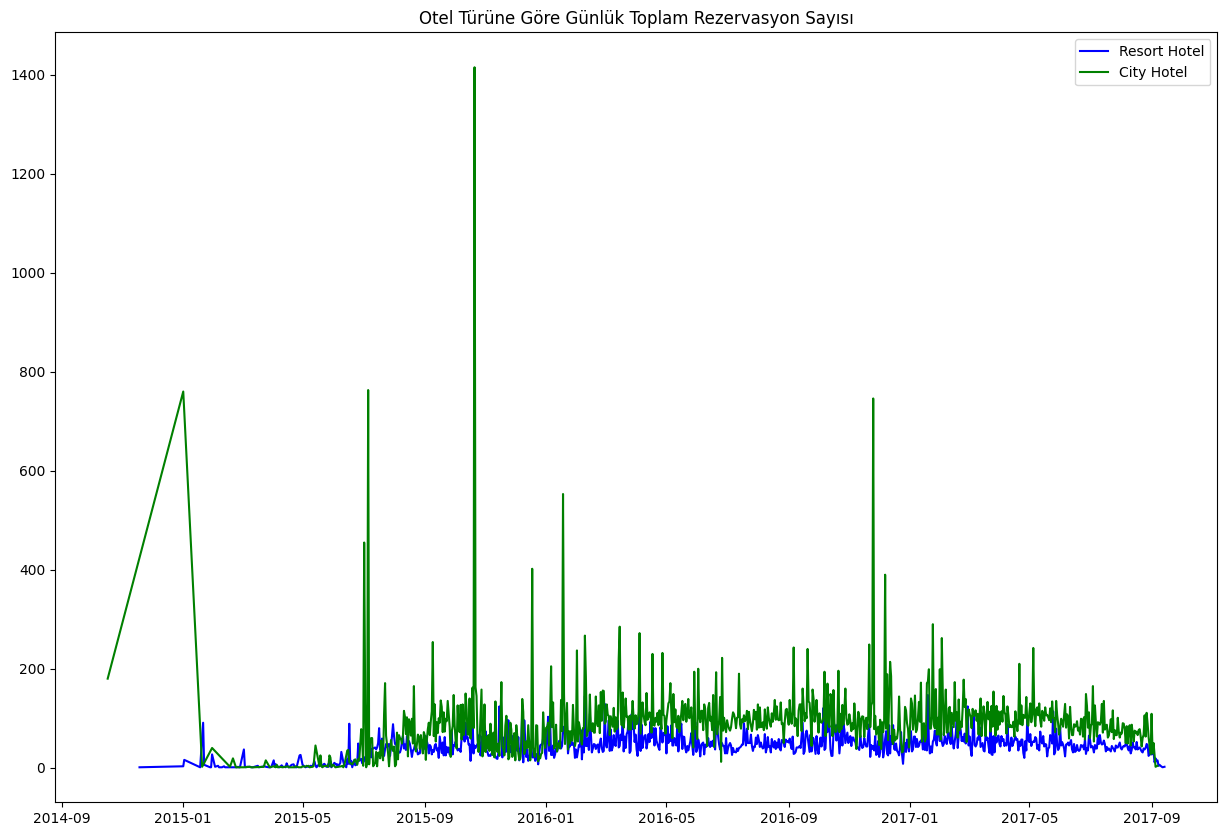

In [138]:
resort_hotel = df[df['hotel'] == 'Resort Hotel'].groupby('reservation_status_date').agg(total_reservations=('hotel', 'size'), canceled_reservations=('is_canceled', 'sum'))
city_hotel = df[df['hotel'] == 'City Hotel'].groupby('reservation_status_date').agg(total_reservations=('hotel', 'size'), canceled_reservations=('is_canceled', 'sum'))
# Plotting Total Reservations
plt.figure(figsize=(15, 10))
plt.title('Otel Türüne Göre Günlük Toplam Rezervasyon Sayısı')
plt.plot(resort_hotel.index, resort_hotel['total_reservations'], label='Resort Hotel', color='blue')
plt.plot(city_hotel.index, city_hotel['total_reservations'], label='City Hotel', color='green')
plt.legend()
plt.show()

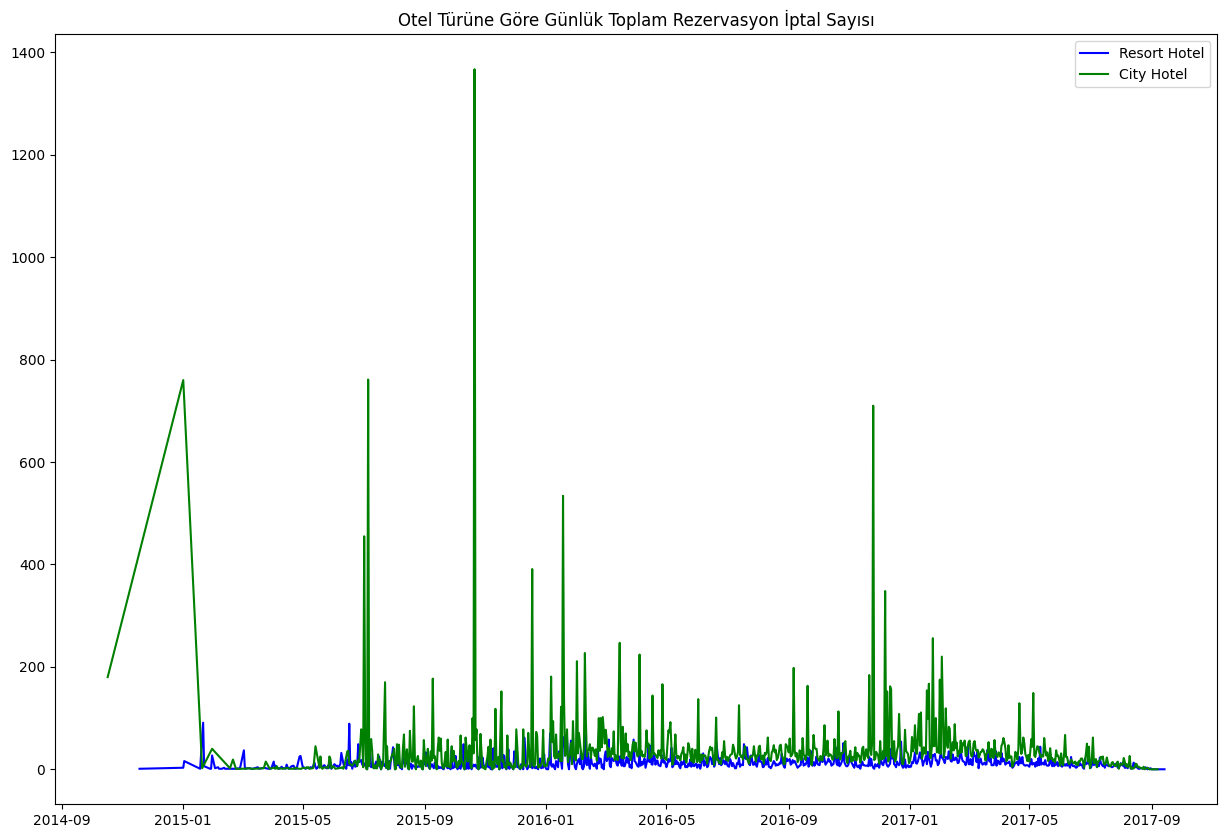

In [139]:
plt.figure(figsize=(15, 10))
plt.title('Otel Türüne Göre Günlük Toplam Rezervasyon İptal Sayısı')
plt.plot(resort_hotel.index, resort_hotel['canceled_reservations'], label='Resort Hotel', color='blue')
plt.plot(city_hotel.index, city_hotel['canceled_reservations'], label='City Hotel', color='green')
plt.legend()
plt.show()

In [140]:
country_cancellation_rate = df.groupby('country')['is_canceled'].mean()
country_booking_count = df.groupby('country')['is_canceled'].count()

# DataFrame olarak düzenleme
country_cancellation_df = country_cancellation_rate.reset_index()
country_cancellation_df.columns = ['Country', 'Cancellation Rate']
country_cancellation_df['Booking Count'] = country_booking_count.values

# Plotly ile pasta grafiği oluşturma
fig = px.pie(country_cancellation_df,
             values='Booking Count',
             names='Country',
             title='Ülkelere Göre İptal Edilen Rezervasyon Sayısı ve Rezervasyon İptal Oranı',
             template='seaborn')

fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

In [141]:
agent_booking_count = df['agent'].value_counts().reset_index()
agent_booking_count.columns = ['Agent', 'Booking Count']

# Plotly ile pasta grafiği oluşturma
fig_agent = px.pie(agent_booking_count,
                   values='Booking Count',
                   names='Agent',
                   title='Booking Count by Agent',
                   template='seaborn')

fig_agent.update_traces(textposition='inside', textinfo='value+percent+label')
fig_agent.show()

Assigned Room - Reserves Room İlişkisi

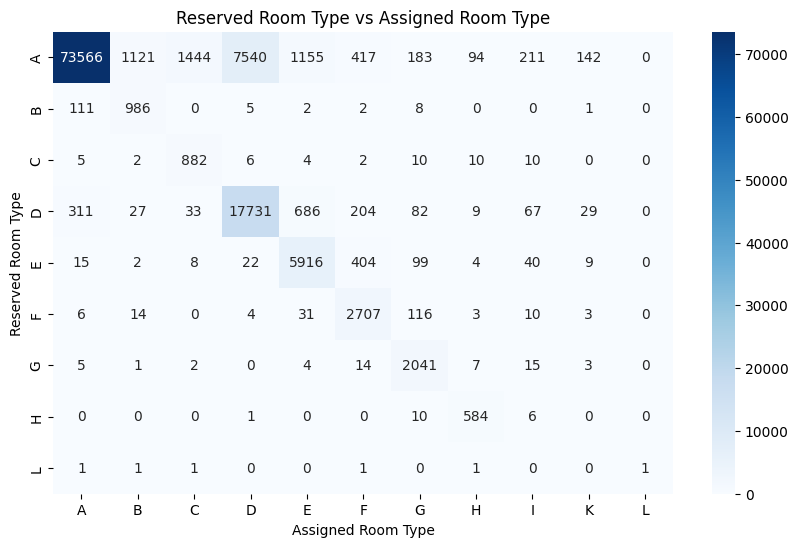

In [142]:
matrix = pd.crosstab(df['reserved_room_type'], df['assigned_room_type'])

# Matrisin görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Reserved Room Type vs Assigned Room Type")
plt.xlabel("Assigned Room Type")
plt.ylabel("Reserved Room Type")
plt.show()

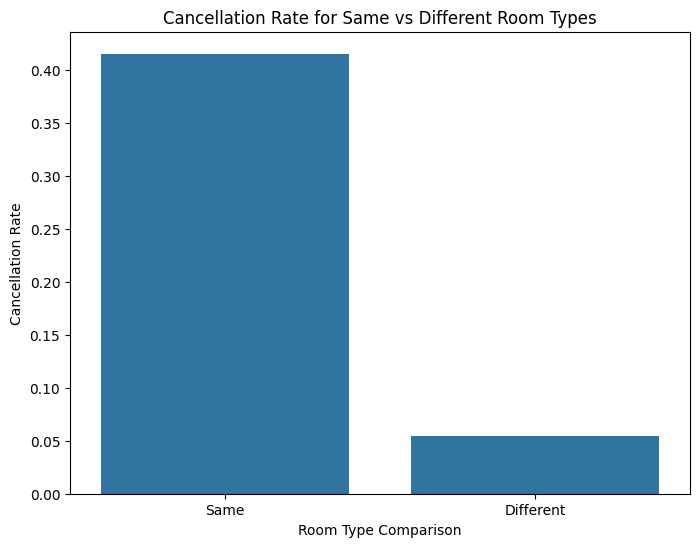

In [143]:
same_room = df[df['reserved_room_type'] == df['assigned_room_type']]
different_room = df[df['reserved_room_type'] != df['assigned_room_type']]

# İptal oranlarının hesaplanması
same_room_cancel_rate = same_room['is_canceled'].mean()
different_room_cancel_rate = different_room['is_canceled'].mean()

# Sonuçları bir DataFrame olarak gösterme
cancel_comparison = pd.DataFrame({
    'Room Type Comparison': ['Same', 'Different'],
    'Cancellation Rate': [same_room_cancel_rate, different_room_cancel_rate]
})

# Sütun grafiği oluşturma
plt.figure(figsize=(8, 6))
sns.barplot(x='Room Type Comparison', y='Cancellation Rate', data=cancel_comparison)
plt.title("Cancellation Rate for Same vs Different Room Types")
plt.ylabel("Cancellation Rate")
plt.show()

In [144]:
# Nominal sütunlar için One-Hot Encoding
nominal_columns = ['hotel', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'assigned_room_type', 'deposit_type',
                   'customer_type']

df = pd.get_dummies(df, columns=nominal_columns)

# Ordinal sütunlar için Label Encoding
ordinal_columns = ['arrival_date_month', 'meal']

meal_order = ['SC', 'BB', 'HB', 'FB']  # SC - no meal package < BB - Bed & Breakfast < HB - Half board < FB - Full board

# LabelEncoder ile sıralı verileri encode etme
label_encoder = LabelEncoder()

# meal sütunu için encoding
label_encoder.fit(meal_order)
df['meal'] = label_encoder.transform(df['meal'])

# Encoded edilmiş veri setini kontrol etme
print("Encoded veri setinin ilk birkaç satırı:")
print(df.head())

Encoded veri setinin ilk birkaç satırı:
   is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        342               2015                   7   
1            0        737               2015                   7   
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2         0  ...   
1                        0                     0    

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 65 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     119210 non-null  int64         
 1   lead_time                       119210 non-null  int64         
 2   arrival_date_year               119210 non-null  int64         
 3   arrival_date_month              119210 non-null  int64         
 4   arrival_date_week_number        119210 non-null  int64         
 5   arrival_date_day_of_month       119210 non-null  int64         
 6   stays_in_weekend_nights         119210 non-null  int64         
 7   stays_in_week_nights            119210 non-null  int64         
 8   adults                          119210 non-null  int64         
 9   children                        119210 non-null  int64         
 10  babies                          119210 non-null  int64       

In [146]:
features = [
    'lead_time', 'total_of_special_requests', 'required_car_parking_spaces',
    'booking_changes', 'previous_cancellations', 'is_repeated_guest',
    'adults', 'previous_bookings_not_canceled', 'days_in_waiting_list',
    'agent', 'adr', 'babies', 'stays_in_week_nights', 'arrival_date_year',
    'arrival_date_week_number', 'arrival_date_day_of_month', 'children', 'arrival_date_month',
    'stays_in_weekend_nights'
]


In [147]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119210 non-null  int64  
 1   total_of_special_requests       119210 non-null  int64  
 2   required_car_parking_spaces     119210 non-null  int64  
 3   booking_changes                 119210 non-null  int64  
 4   previous_cancellations          119210 non-null  int64  
 5   is_repeated_guest               119210 non-null  int64  
 6   adults                          119210 non-null  int64  
 7   previous_bookings_not_canceled  119210 non-null  int64  
 8   days_in_waiting_list            119210 non-null  int64  
 9   agent                           119210 non-null  float64
 10  adr                             119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  stays_in_week_nights 

In [148]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df[features]

# Standardizing the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
Sayısal_scaled_df = pd.DataFrame(x_scaled, columns=features)

####PCA

PCA (n=2)

In [149]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Choose the number of components to keep
principal_components = pca.fit_transform(x_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['is_canceled'] = df['is_canceled']  # Add the target variable for visualization

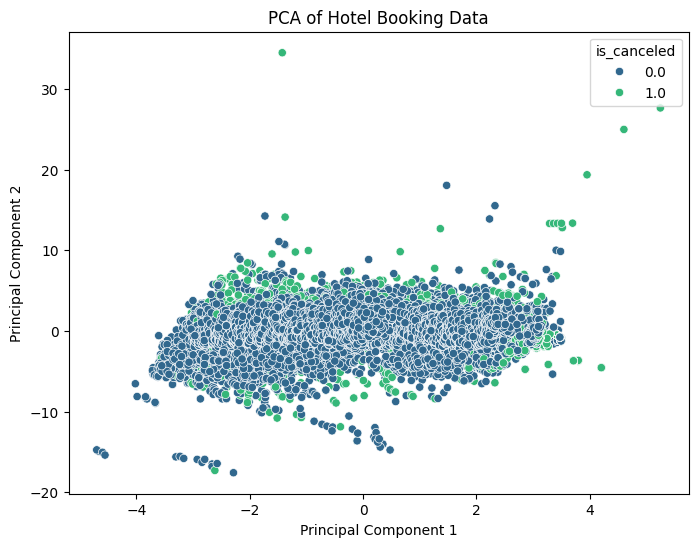

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the 2D PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='is_canceled', data=pca_df, palette='viridis')
plt.title('PCA of Hotel Booking Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [151]:
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance*100:.2f}% of variance")

Principal Component 1: 12.84% of variance
Principal Component 2: 10.35% of variance


PCA - Optimal n Bulma

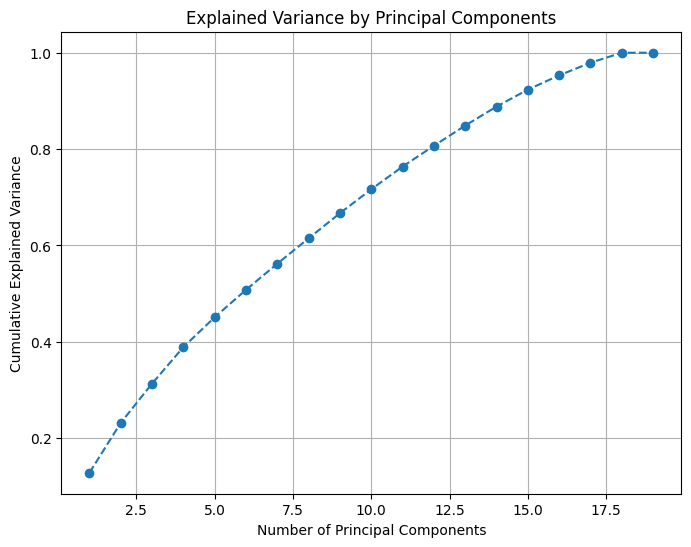

In [152]:
pca = PCA()
pca.fit(x_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [153]:
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of components explaining 90% of the variance: {optimal_components}")

Number of components explaining 90% of the variance: 15


####Korelasyon Matrisi

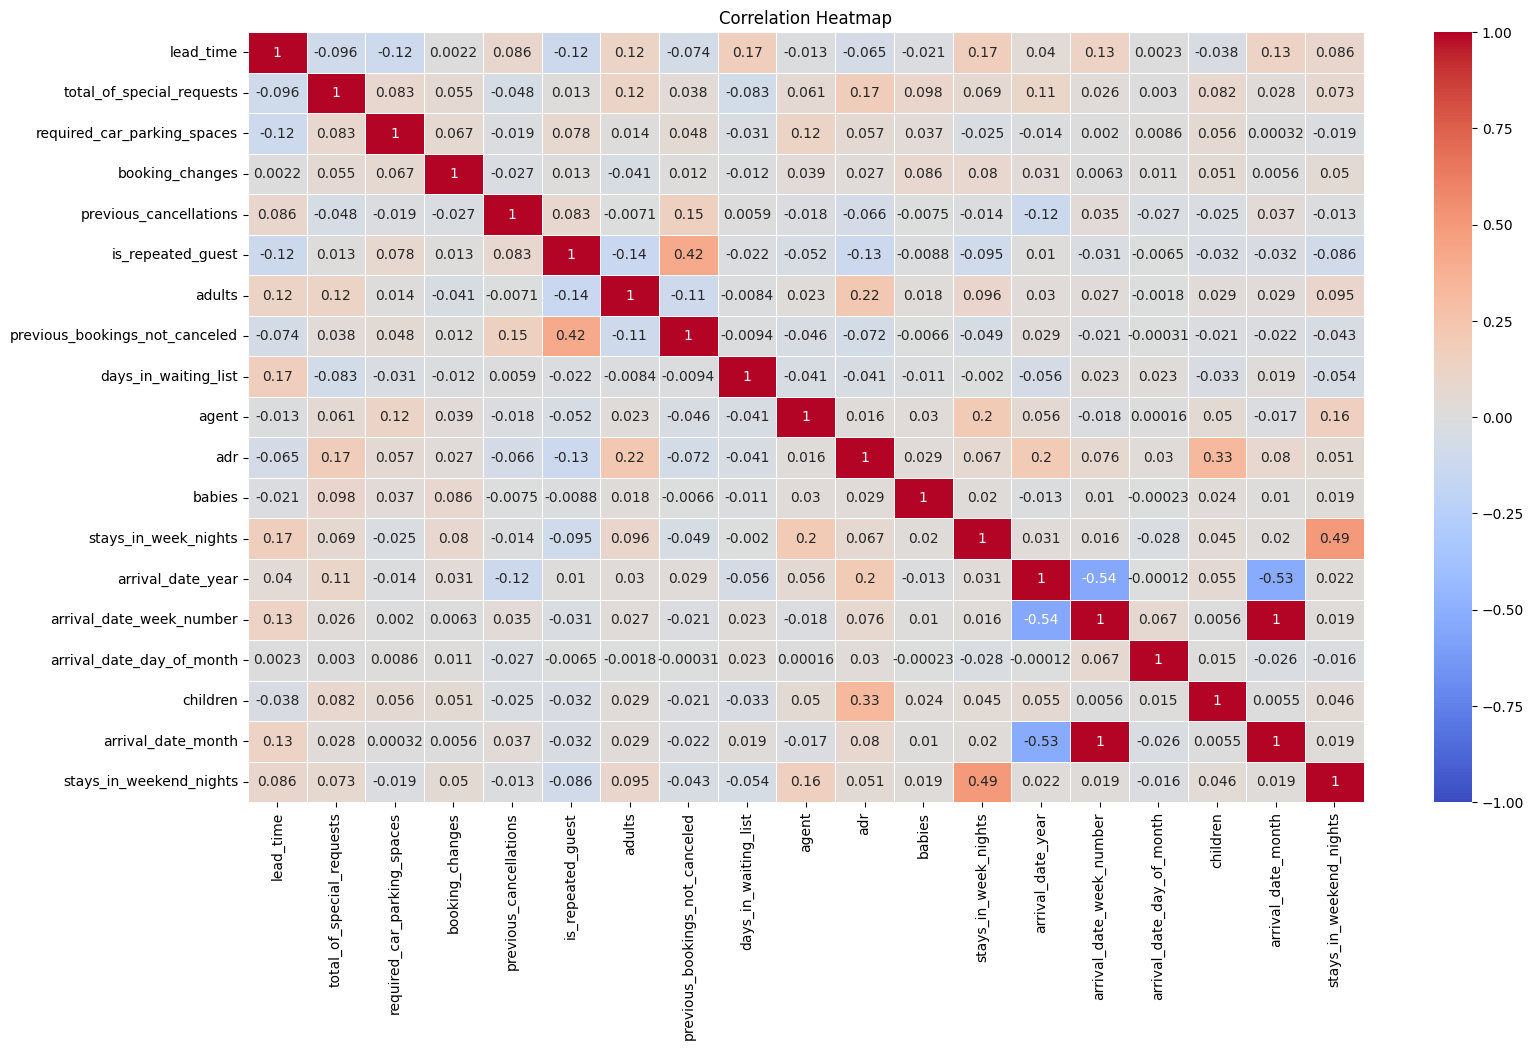

In [154]:
corr_matrix = df[features].corr()

# Heatmap oluşturma
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

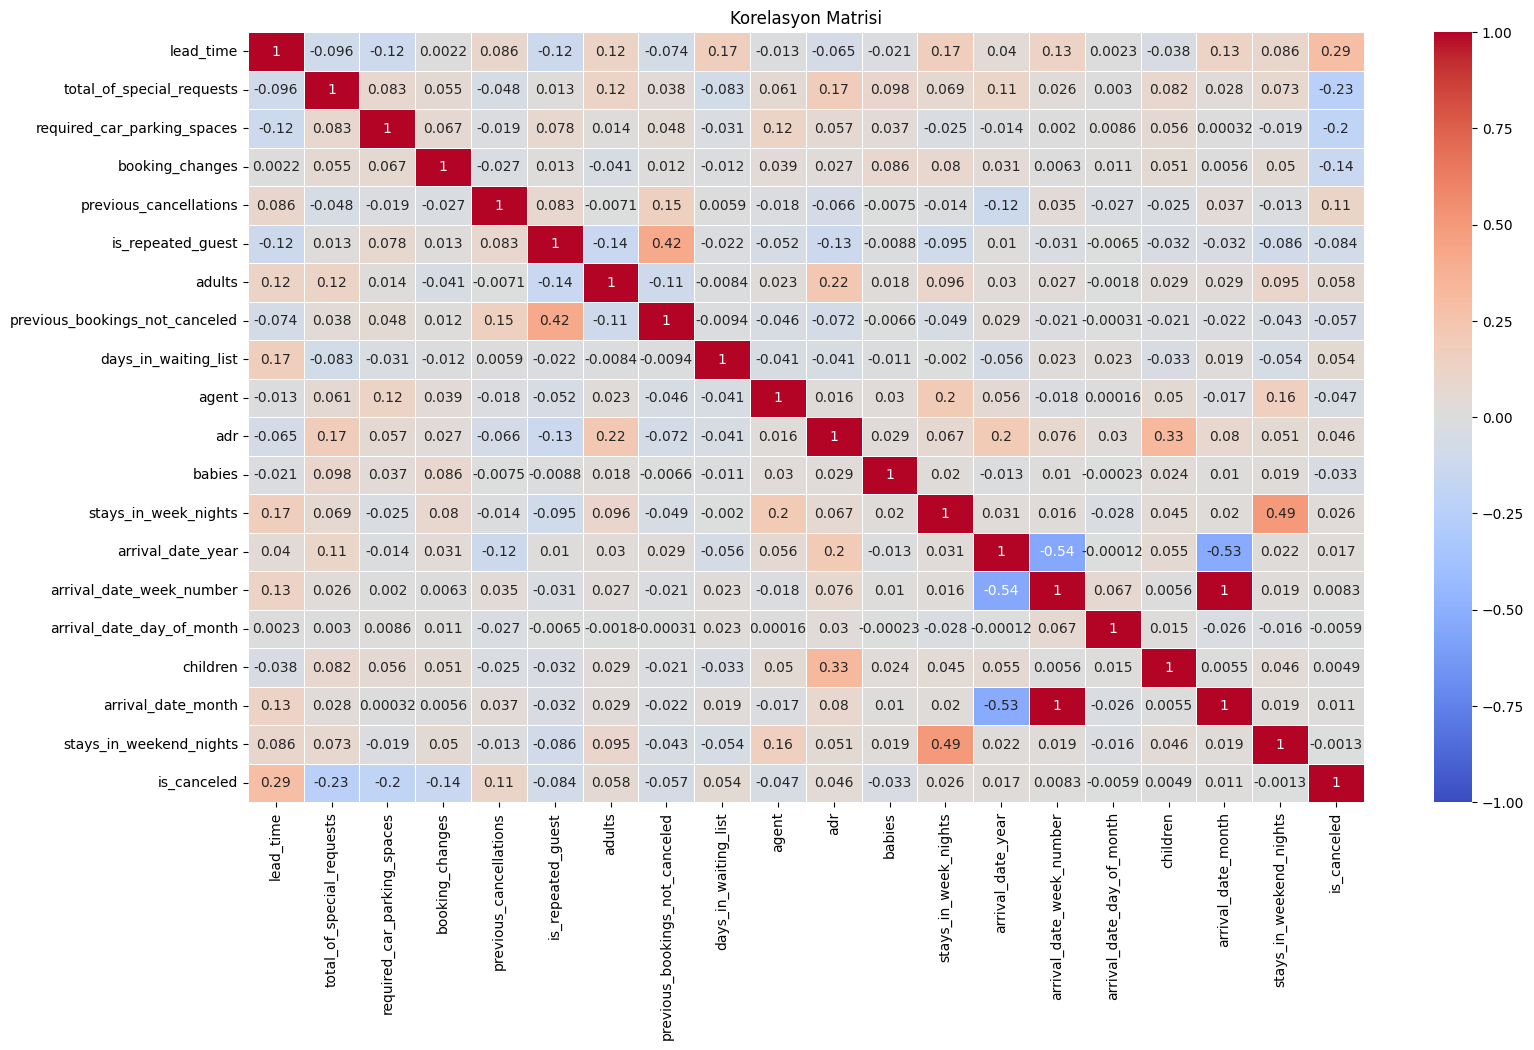

In [155]:
features_with_canceled = features + ['is_canceled']
df_with_canceled = df[features_with_canceled]

# Korelasyon matrisini oluşturun
corr_matrix_with_canceled = df_with_canceled.corr()


# Heatmap oluşturma
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix_with_canceled, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

####Pair-Plot

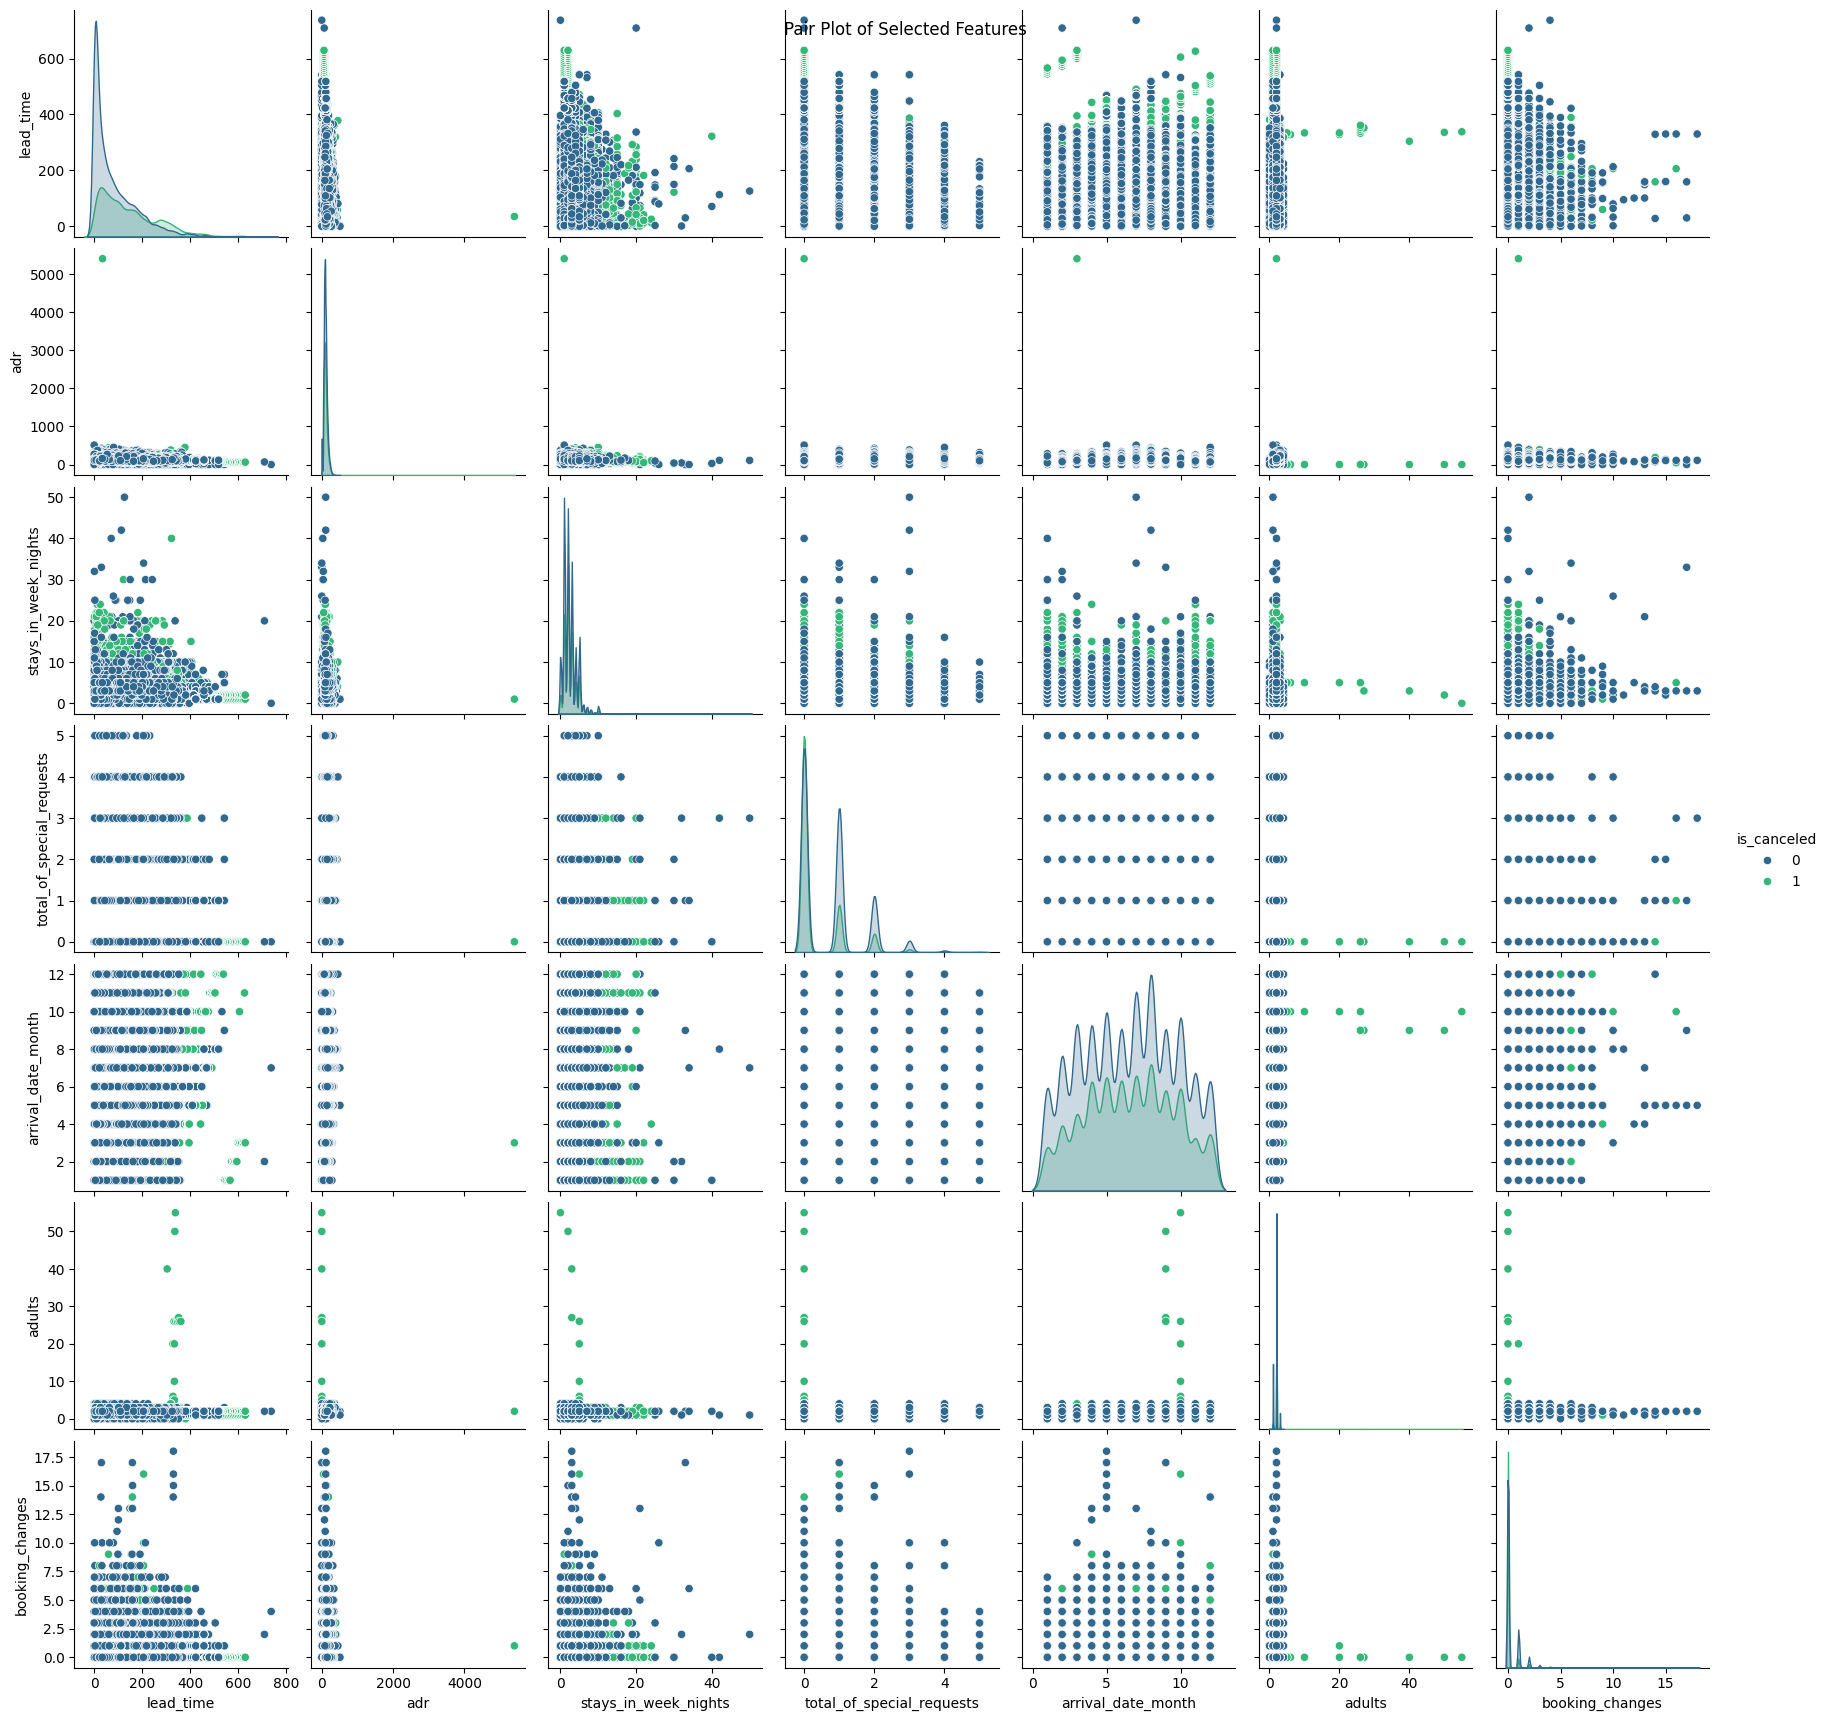

In [156]:
subset_df = df[['lead_time', 'adr', 'stays_in_week_nights',
    'total_of_special_requests', 'arrival_date_month',
    'adults', 'booking_changes',
                'is_canceled']]

# Create a pair plot
sns.pairplot(subset_df, hue='is_canceled', palette='viridis')
plt.suptitle('Pair Plot of Selected Features')
plt.show()

# Modeller

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import xgboost as xgb

##Veri Düzenleme

In [158]:
columns_to_drop = ['country', 'arrival_date_week_number',  'reservation_status_date']
data = df.drop(columns=columns_to_drop)

In [159]:
for col in data.columns:
    if data[col].dtype == 'object':
        # Sadece 0 ve 1 değerlerine sahip olan sütunları bool olarak ayarlayın
        if set(data[col].unique()) <= {'0', '1', 0, 1, True, False}:
            data[col] = data[col].astype(bool)
data.to_csv('data_cleaned.csv', index=False)



In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_year               119210 non-null  int64  
 3   arrival_date_month              119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  int64  
 9   babies                          119210 non-null  int64  
 10  meal                            119210 non-null  int64  
 11  is_repeated_guest               119210 non-null  int64  
 12  previous_cancellation

In [161]:
# Kategorik özellikleri seçin
kategorik_ozellikler = [
    'hotel_City Hotel', 'hotel_Resort Hotel',
    'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate',
    'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
    'market_segment_Online TA', 'market_segment_Undefined', 'distribution_channel_Corporate',
    'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO',
    'distribution_channel_Undefined', 'reserved_room_type_A', 'reserved_room_type_B',
    'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F',
    'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L',
    'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C',
    'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F',
    'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I',
    'assigned_room_type_K', 'assigned_room_type_L', 'deposit_type_No Deposit',
    'deposit_type_Non Refund', 'deposit_type_Refundable', 'customer_type_Contract',
    'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party','is_canceled'
]

# Kategorik öznitelikleri seçin
kategorik_df = data[kategorik_ozellikler]


In [162]:
features = [
    'lead_time', 'total_of_special_requests', 'required_car_parking_spaces',
    'booking_changes', 'previous_cancellations', 'is_repeated_guest',
    'adults', 'previous_bookings_not_canceled', 'days_in_waiting_list',
    'agent', 'adr', 'babies', 'stays_in_week_nights', 'arrival_date_year', 'arrival_date_day_of_month', 'children', 'arrival_date_month',
    'stays_in_weekend_nights'
]

In [163]:
data[features].var()

,0
lead_time,11422.361808
total_of_special_requests,0.628652
required_car_parking_spaces,0.060201
booking_changes,0.407688
previous_cancellations,0.713887
is_repeated_guest,0.030507
adults,0.330838
previous_bookings_not_canceled,2.244415
days_in_waiting_list,309.689671
agent,11485.169679


In [164]:
sayısal_data = data[features]

standardized_data = scaler.fit_transform(sayısal_data)

standardized_df = pd.DataFrame(standardized_data, columns=features)

data = pd.concat([standardized_df, kategorik_df], axis=1)

In [165]:
data= data.dropna()

In [166]:
print(data.shape)
data.var()

(119030, 61)


,0
lead_time,1.000165
total_of_special_requests,0.999288
required_car_parking_spaces,1.001056
booking_changes,1.000585
previous_cancellations,1.001394
...,...
customer_type_Contract,0.03304
customer_type_Group,0.004799
customer_type_Transient,0.18723
customer_type_Transient-Party,0.166148


##Test-Eğitim Verisi Hazırlama

In [167]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
data_cleaned = pd.read_csv('data_cleaned.csv')
X = data_cleaned.drop('is_canceled', axis=1)
y = data_cleaned['is_canceled']

rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_year               119210 non-null  int64  
 3   arrival_date_month              119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  int64  
 9   babies                          119210 non-null  int64  
 10  meal                            119210 non-null  int64  
 11  is_repeated_guest               119210 non-null  int64  
 12  previous_cancell

##Desicion Tree

In [168]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]

###Test

In [169]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Test Accuracy: {accuracy_dt:.4f}")

precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree Test Precision: {precision_dt:.4f}")

recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree Test Recall: {recall_dt:.4f}")

f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"Decision Tree Test F1 Score: {f1_dt:.4f}")

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Test Confusion Matrix:\n{conf_matrix_dt}")

Decision Tree Test Accuracy: 0.8268
Decision Tree Test Precision: 0.8273
Decision Tree Test Recall: 0.8268
Decision Tree Test F1 Score: 0.8270
Decision Tree Test Confusion Matrix:
[[19279  3191]
 [ 3004 10289]]


K-Fold Validation

In [170]:
kfold = KFold(n_splits=5, shuffle=True)

# Decision Tree modelini tanımlıyoruz
dt = DecisionTreeClassifier()

# K-Fold Cross Validation uygulayarak tahminler alıyoruz
y_pred_dt = cross_val_predict(dt, X, y, cv=kfold)
y_pred_prob_dt = cross_val_predict(dt, X, y, cv=kfold, method='predict_proba')[:, 1]

# Performans metriklerini hesaplıyoruz
accuracy_dt = accuracy_score(y, y_pred_dt)
precision_dt = precision_score(y, y_pred_dt, average='weighted')
recall_dt = recall_score(y, y_pred_dt, average='weighted')
f1_dt = f1_score(y, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y, y_pred_dt)

# Sonuçları yazdırıyoruz
print(f"Decision Tree Test Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Test Precision: {precision_dt:.4f}")
print(f"Decision Tree Test Recall: {recall_dt:.4f}")
print(f"Decision Tree Test F1 Score: {f1_dt:.4f}")
print(f"Decision Tree Test Confusion Matrix:\n{conf_matrix_dt}")

Decision Tree Test Accuracy: 0.8306
Decision Tree Test Precision: 0.8310
Decision Tree Test Recall: 0.8306
Decision Tree Test F1 Score: 0.8308
Decision Tree Test Confusion Matrix:
[[64664 10347]
 [ 9852 34347]]


Decision Tree Test AUC: 0.8234


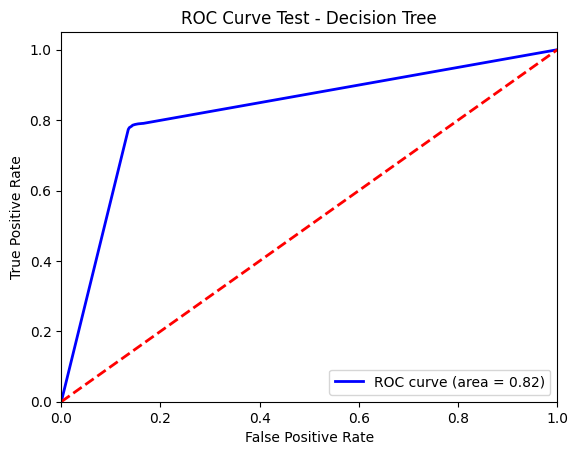

In [171]:
fpr, tpr, _ = roc_curve(y, y_pred_prob_dt)
roc_auc = auc(fpr, tpr)
print(f"Decision Tree Test AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi Test - Karar Ağacı')
plt.legend(loc="lower right")
plt.show()

###Train

In [172]:
dt.fit(X_train, y_train)
x_pred_dt = dt.predict(X_train)
x_pred_prob_dt = dt.predict_proba(X_train)[:, 1]
accuracy = accuracy_score(y_train, x_pred_dt)
precision = precision_score(y_train, x_pred_dt, average='weighted')
recall = recall_score(y_train, x_pred_dt, average='weighted')
f1 = f1_score(y_train, x_pred_dt, average='weighted')
conf_matrix = confusion_matrix(y_train, x_pred_dt)

print(f"Decision Tree Train Accuracy: {accuracy:.4f}")
print(f"Decision Tree Train Precision: {precision:.4f}")
print(f"Decision Tree Train Recall: {recall:.4f}")
print(f"Decision Tree Train F1 Score: {f1:.4f}")
print(f"Decision Tree Train Confusion Matrix:\n{conf_matrix}")

Decision Tree Train Accuracy: 0.9921
Decision Tree Train Precision: 0.9921
Decision Tree Train Recall: 0.9921
Decision Tree Train F1 Score: 0.9921
Decision Tree Train Confusion Matrix:
[[52331   210]
 [  446 30460]]


Decision Tree Train AUC: 0.9998


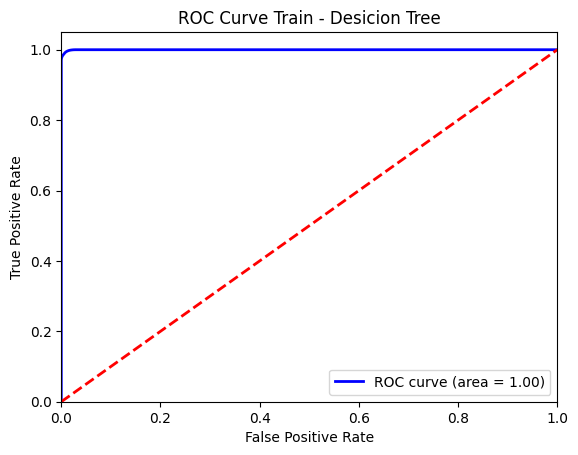

In [173]:
fpr, tpr, _ = roc_curve(y_train, x_pred_prob_dt)
roc_auc = auc(fpr, tpr)
print(f"Decision Tree Train AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi Eğitim - Karar Ağacı')
plt.legend(loc="lower right")
plt.show()

##Random Forest

In [174]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

###Test

In [175]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

# Precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Test Precision: {precision_rf:.4f}")

# Recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Test Recall: {recall_rf:.4f}")

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest Test F1 Score: {f1_rf:.4f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Random Forest Test Confusion Matrix:\n{conf_matrix_rf}")


Random Forest Test Accuracy: 0.8713
Random Forest Test Precision: 0.8714
Random Forest Test Recall: 0.8713
Random Forest Test F1 Score: 0.8694
Random Forest Test Confusion Matrix:
[[20987  1483]
 [ 3118 10175]]


K-Fold Validation

In [176]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest modelini tanımlıyoruz
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# K-Fold Cross Validation uygulayarak tahminler alıyoruz
y_pred_rf = cross_val_predict(rf, X, y, cv=kfold, method='predict')
y_pred_prob_rf = cross_val_predict(rf, X, y, cv=kfold, method='predict_proba')[:, 1]

# Performans metriklerini hesaplıyoruz
accuracy_rf = accuracy_score(y, y_pred_rf)
precision_rf = precision_score(y, y_pred_rf, average='weighted')
recall_rf = recall_score(y, y_pred_rf, average='weighted')
f1_rf = f1_score(y, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Test Precision: {precision_rf:.4f}")
print(f"Random Forest Test Recall: {recall_rf:.4f}")
print(f"Random Forest Test F1 Score: {f1_rf:.4f}")
print(f"Random Forest Test Confusion Matrix:\n{conf_matrix_rf}")

Random Forest Test Accuracy: 0.8741
Random Forest Test Precision: 0.8740
Random Forest Test Recall: 0.8741
Random Forest Test F1 Score: 0.8723
Random Forest Test Confusion Matrix:
[[70034  4977]
 [10031 34168]]


Random Forest AUC: 0.9383


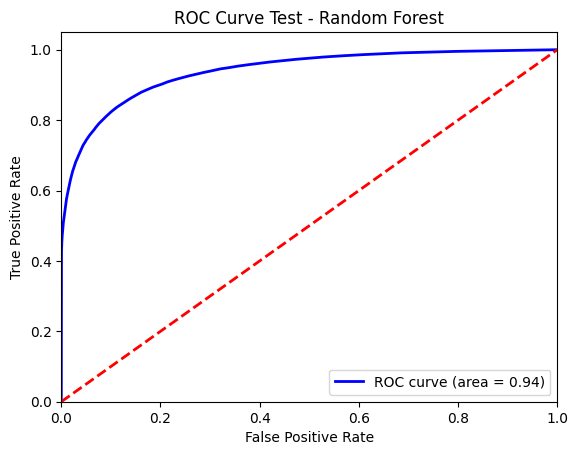

In [177]:
fpr, tpr, _ = roc_curve(y, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)
print(f"Random Forest AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi Test - Random Forest')
plt.legend(loc="lower right")
plt.show()

###Train

In [178]:
rf.fit(X_train, y_train)
x_pred_rf = rf.predict(X_train)
x_pred_prob_rf = rf.predict_proba(X_train)[:, 1]
accuracy = accuracy_score(y_train, x_pred_rf)
precision = precision_score(y_train, x_pred_rf, average='weighted')
recall = recall_score(y_train, x_pred_rf, average='weighted')
f1 = f1_score(y_train, x_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_train, x_pred_rf)

print(f"Random Forest Train Accuracy: {accuracy:.4f}")
print(f"Random Forest Train Precision: {precision:.4f}")
print(f"Random Forest Train Recall: {recall:.4f}")
print(f"Random Forest Train F1 Score: {f1:.4f}")
print(f"Random Forest Train Confusion Matrix:\n{conf_matrix_rf}")

Random Forest Train Accuracy: 0.9921
Random Forest Train Precision: 0.9921
Random Forest Train Recall: 0.9921
Random Forest Train F1 Score: 0.9921
Random Forest Train Confusion Matrix:
[[70034  4977]
 [10031 34168]]


Random Forest Train AUC: 0.9992


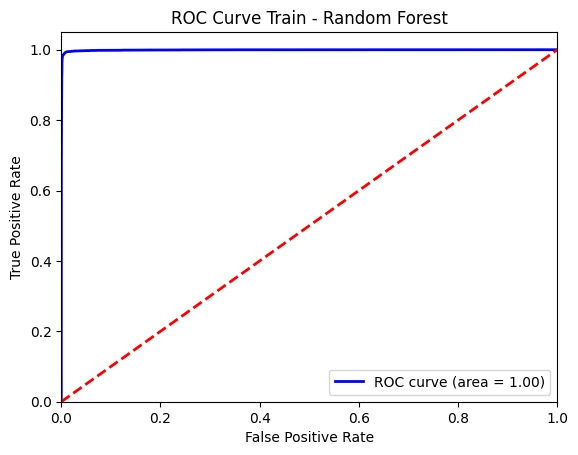

In [179]:
fpr, tpr, _ = roc_curve(y_train, x_pred_prob_rf)
roc_auc = auc(fpr, tpr)
print(f"Random Forest Train AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi Eğitim - Rastgele Orman')
plt.legend(loc="lower right")
plt.show()

In [180]:
print(f"Number of Trees (n_estimators): {rf.n_estimators}")
tree_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
print(f"Average Max Depth: {np.mean(tree_depths)}")
print(f"Max Depths: {tree_depths}")
total_params = sum(tree.tree_.node_count for tree in rf.estimators_)
print(f"Total Number of Parameters (Nodes): {total_params}")
print(f"Bootstrap Enabled: {rf.bootstrap}")

Number of Trees (n_estimators): 100
Average Max Depth: 48.25
Max Depths: [48, 48, 46, 44, 44, 48, 53, 51, 44, 45, 43, 52, 52, 46, 51, 54, 51, 46, 43, 41, 45, 47, 57, 47, 49, 48, 47, 51, 51, 52, 50, 50, 48, 50, 46, 48, 44, 53, 49, 50, 56, 48, 51, 48, 45, 49, 52, 47, 51, 49, 50, 48, 46, 51, 51, 47, 47, 47, 48, 46, 47, 47, 45, 53, 46, 49, 50, 47, 51, 46, 44, 45, 48, 53, 49, 44, 56, 50, 44, 43, 50, 49, 48, 50, 49, 50, 48, 48, 46, 53, 43, 47, 44, 46, 52, 46, 48, 42, 52, 48]
Total Number of Parameters (Nodes): 2734612
Bootstrap Enabled: True


##XGBoost

In [181]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

###Test

In [182]:
# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")

# Precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost Test Precision: {precision_xgb:.4f}")

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost Test Recall: {recall_xgb:.4f}")

# F1 Score
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost Test F1 Score: {f1_xgb:.4f}")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"XGBoost Test Confusion Matrix:\n{conf_matrix_xgb}")

XGBoost Test Accuracy: 0.8533
XGBoost Test Precision: 0.8538
XGBoost Test Recall: 0.8533
XGBoost Test F1 Score: 0.8503
XGBoost Test Confusion Matrix:
[[20891  1579]
 [ 3666  9627]]


K-Fold Validation

In [225]:
import xgboost as xgb
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

xgboost_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# K-Fold Cross Validation uygulayarak tahminler alıyoruz
y_pred_xgb = cross_val_predict(xgboost_model, X, y, cv=kfold, method='predict')
y_pred_prob_xgb = cross_val_predict(xgboost_model, X, y, cv=kfold, method='predict_proba')[:, 1]

# Performans metriklerini hesaplıyoruz
accuracy_xgb = accuracy_score(y, y_pred_xgb)
precision_xgb = precision_score(y, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y, y_pred_xgb)

# Sonuçları yazdırıyoruz
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Test Precision: {precision_xgb:.4f}")
print(f"XGBoost Test Recall: {recall_xgb:.4f}")
print(f"XGBoost Test F1 Score: {f1_xgb:.4f}")
print(f"XGBoost Test Confusion Matrix:\n{conf_matrix_xgb}")


XGBoost Test Accuracy: 0.8547
XGBoost Test Precision: 0.8551
XGBoost Test Recall: 0.8547
XGBoost Test F1 Score: 0.8519
XGBoost Test Confusion Matrix:
[[69731  5280]
 [12036 32163]]


XGBoost Test AUC: 0.9240


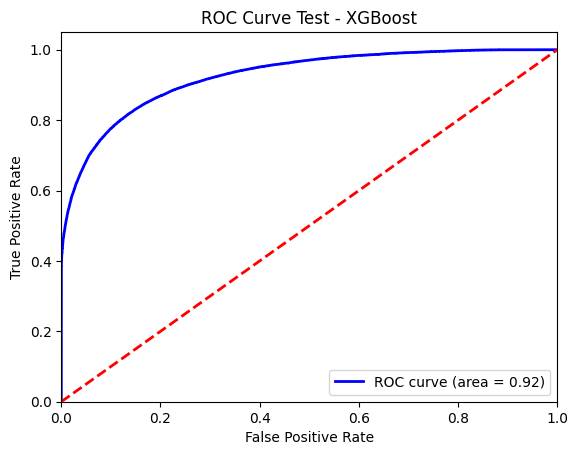

In [227]:
fpr, tpr, _ = roc_curve(y, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)
print(f"XGBoost Test AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test - XGBoost')
plt.legend(loc="lower right")
plt.show()

###Train

In [187]:
x_pred_xgb = xgb.predict(X_train)
x_pred_prob_xgb = xgb.predict_proba(X_train)[:, 1]

accuracy = accuracy_score(y_train, x_pred_xgb)
precision = precision_score(y_train, x_pred_xgb, average='weighted')
recall = recall_score(y_train, x_pred_xgb, average='weighted')
f1 = f1_score(y_train, x_pred_xgb, average='weighted')

print(f"XGBoost Train Accuracy: {accuracy:.4f}")
print(f"XGBoost Train Precision: {precision:.4f}")
print(f"XGBoost Train Recall: {recall:.4f}")
print(f"XGBoost Train F1 Score: {f1:.4f}")

XGBoost Train Accuracy: 0.8684
XGBoost Train Precision: 0.8692
XGBoost Train Recall: 0.8684
XGBoost Train F1 Score: 0.8660


Random Forest Train AUC: 0.8439


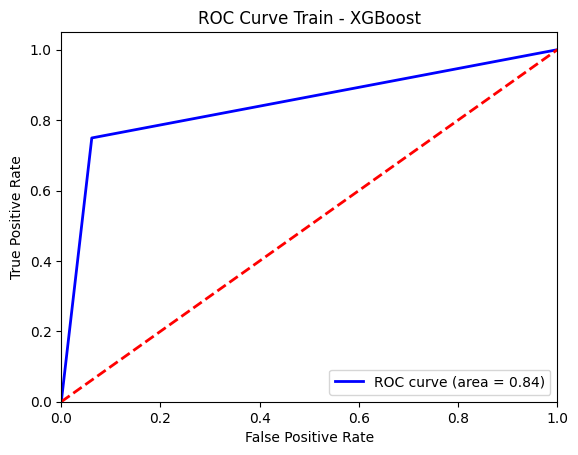

In [188]:
fpr, tpr, _ = roc_curve(y_train, x_pred_xgb)
roc_auc = auc(fpr, tpr)
print(f"Random Forest Train AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi Eğitim - XGBoost')
plt.legend(loc="lower right")
plt.show()

## Logistic Regresyon

In [189]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
y_pred_prob_lgr = lgr.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###Test

In [190]:
# Accuracy
accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
precision_lgr = precision_score(y_test, y_pred_lgr, average='weighted')
recall_lgr = recall_score(y_test, y_pred_lgr, average='weighted')
f1_lgr = f1_score(y_test, y_pred_lgr, average='weighted')
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)
print(f"Logistic Regression Test Accuracy: {accuracy_lgr:.4f}")
print(f"Logistic Regression Test Precision: {precision_lgr:.4f}")
print(f"Logistic Regression Test Recall: {recall_lgr:.4f}")
print(f"Logistic Regression Test F1 Score: {f1_lgr:.4f}")
print(f"Logistic Regression Test Confusion Matrix:\n{conf_matrix_lgr}")
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lgr)
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression AUC: {roc_auc:.4f}")


Logistic Regression Test Accuracy: 0.7641
Logistic Regression Test Precision: 0.7641
Logistic Regression Test Recall: 0.7641
Logistic Regression Test F1 Score: 0.7524
Logistic Regression Test Confusion Matrix:
[[20301  2169]
 [ 6268  7025]]
Logistic Regression AUC: 0.7838


Train

In [191]:
x_pred_lgr = lgr.predict(X_train)
x_pred_prob_lgr = lgr.predict_proba(X_train)[:, 1]
accuracy_lgr = accuracy_score(y_train, x_pred_lgr)
precision_lgr = precision_score(y_train, x_pred_lgr, average='weighted')
recall_lgr = recall_score(y_train, x_pred_lgr, average='weighted')
f1_lgr = f1_score(y_train, x_pred_lgr, average='weighted')
conf_matrix_lgr = confusion_matrix(y_train, x_pred_lgr)
print(f"Logistic Regression Train Accuracy: {accuracy_lgr:.4f}")
print(f"Logistic Regression Train Precision: {precision_lgr:.4f}")
print(f"Logistic Regression Train Recall: {recall_lgr:.4f}")
print(f"Logistic Regression Train F1 Score: {f1_lgr:.4f}")
print(f"Logistic Regression Train Confusion Matrix:\n{conf_matrix_lgr}")
fpr, tpr, _ = roc_curve(y_train, x_pred_prob_lgr)
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression AUC: {roc_auc:.4f}")


Logistic Regression Train Accuracy: 0.7678
Logistic Regression Train Precision: 0.7680
Logistic Regression Train Recall: 0.7678
Logistic Regression Train F1 Score: 0.7564
Logistic Regression Train Confusion Matrix:
[[47597  4944]
 [14430 16476]]
Logistic Regression AUC: 0.7902


### Hiperparametre Ayarlama

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Hyperparameter arama alanlarını tanımlama
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 750, 1000],
    'solver': ['saga', 'lbfgs', 'liblinear']

}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=2,
    n_jobs=-1,
    verbose=1
)

# Modeli eğitme
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve sonuçları yazdırma
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
En iyi parametreler: {'C': 1, 'max_iter': 500, 'solver': 'liblinear'}
En iyi doğruluk: 0.8115450364371677


In [193]:
best_model = LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')

# Modeli eğitim verisi ile eğitin
best_model.fit(X_train, y_train)

y_pred_lgr = best_model.predict(X_test)
y_pred_prob_lgr = best_model.predict_proba(X_test)[:, 1]

accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
precision_lgr = precision_score(y_test, y_pred_lgr, average='weighted')
recall_lgr = recall_score(y_test, y_pred_lgr, average='weighted')
f1_lgr = f1_score(y_test, y_pred_lgr, average='weighted')
conf_matrix_lgr = confusion_matrix(y_test, y_pred_lgr)
print(f"Logistic Regression Test Accuracy: {accuracy_lgr:.4f}")
print(f"Logistic Regression Test Precision: {precision_lgr:.4f}")
print(f"Logistic Regression Test Recall: {recall_lgr:.4f}")
print(f"Logistic Regression Test F1 Score: {f1_lgr:.4f}")
print(f"Logistic Regression Test Confusion Matrix:\n{conf_matrix_lgr}")


Logistic Regression Test Accuracy: 0.8103
Logistic Regression Test Precision: 0.8133
Logistic Regression Test Recall: 0.8103
Logistic Regression Test F1 Score: 0.8027
Logistic Regression Test Confusion Matrix:
[[20833  1637]
 [ 5149  8144]]


Logistic Regression Test AUC: 0.8579


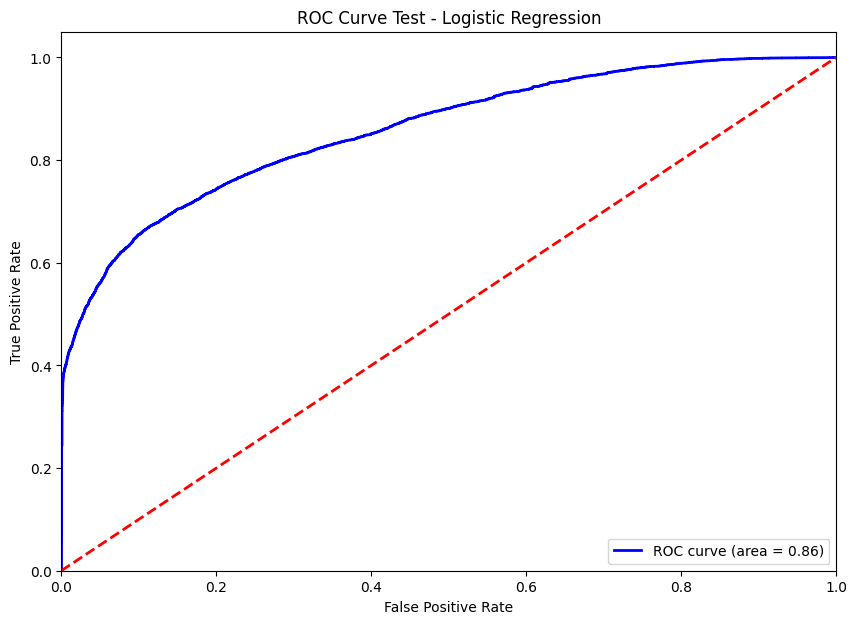

In [194]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lgr)
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression Test AUC: {roc_auc:.4f}")

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

###Train

In [195]:
y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print(f"Logistic Regression Train Accuracy: {accuracy_train:.4f}")

print(f"Logistic Regression Train Precision: {precision_train:.4f}")

print(f"Logistic Regression Train Recall: {recall_train:.4f}")

print(f"Logistic Regression Train F1 Score: {f1_train:.4f}")

print(f"Logistic Regression Train Confusion Matrix:\n{conf_matrix_train}")

Logistic Regression Train Accuracy: 0.8121
Logistic Regression Train Precision: 0.8151
Logistic Regression Train Recall: 0.8121
Logistic Regression Train F1 Score: 0.8046
Logistic Regression Train Confusion Matrix:
[[48776  3765]
 [11914 18992]]


Logistic Regression AUC: 0.8621


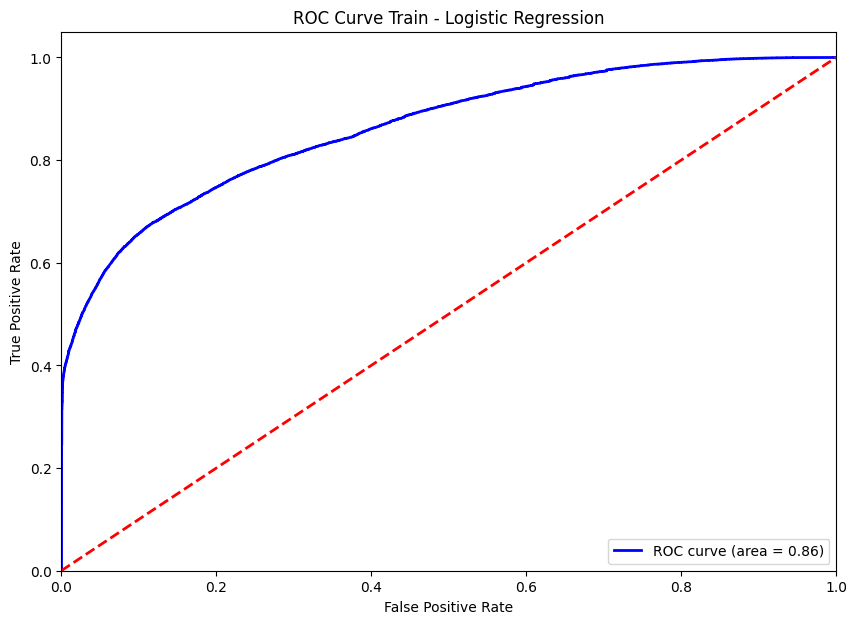

In [196]:
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression AUC: {roc_auc:.4f}")

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### Veri Dengeleme (SMOT - ROS -RUS)

SMOT

In [197]:
best_model_smote = best_model  # Burada `best_model` SMOTE için en iyi parametrelerle ayarlanmış modeldir.
best_model_smote.fit(X_train_smote, y_train_smote)

# Eğitim ve test verisi üzerinde tahminler yapın
y_train_smote_pred = best_model_smote.predict(X_train_smote)
y_train_smote_prob = best_model_smote.predict_proba(X_train_smote)[:, 1]

y_test_pred_smote = best_model_smote.predict(X_test)
y_test_prob_smote = best_model_smote.predict_proba(X_test)[:, 1]

# Performans metriklerini hesaplayın
accuracy_train_smote = accuracy_score(y_train_smote, y_train_smote_pred)
precision_train_smote = precision_score(y_train_smote, y_train_smote_pred, average='weighted')
recall_train_smote = recall_score(y_train_smote, y_train_smote_pred, average='weighted')
f1_train_smote = f1_score(y_train_smote, y_train_smote_pred, average='weighted')
roc_auc_train_smote = roc_auc_score(y_train_smote, y_train_smote_pred)
conf_matrix_train_smote = confusion_matrix(y_train_smote, y_train_smote_pred)

accuracy_test_smote = accuracy_score(y_test, y_test_pred_smote)
precision_test_smote = precision_score(y_test, y_test_pred_smote, average='weighted')
recall_test_smote = recall_score(y_test, y_test_pred_smote, average='weighted')
f1_test_smote = f1_score(y_test, y_test_pred_smote, average='weighted')
roc_auc_test_smote = roc_auc_score(y_test, y_test_pred_smote)
conf_matrix_test_smote = confusion_matrix(y_test, y_test_pred_smote)

# Sonuçları yazdırın
print("SMOTE ile Eğitim Verisi Performansı:")
print(f"Accuracy: {accuracy_train_smote:.4f}")
print(f"Precision: {precision_train_smote:.4f}")
print(f"Recall: {recall_train_smote:.4f}")
print(f"F1 Score: {f1_train_smote:.4f}")
print(f"AUC: {roc_auc_train_smote:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_train_smote}")

print("\nSMOTE ile Test Verisi Performansı:")
print(f"Accuracy: {accuracy_test_smote:.4f}")
print(f"Precision: {precision_test_smote:.4f}")
print(f"Recall: {recall_test_smote:.4f}")
print(f"F1 Score: {f1_test_smote:.4f}")
print(f"AUC: {roc_auc_test_smote:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_test_smote}")

SMOTE ile Eğitim Verisi Performansı:
Accuracy: 0.8129
Precision: 0.8160
Recall: 0.8129
F1 Score: 0.8124
AUC: 0.8129
Confusion Matrix:
[[45335  7206]
 [12460 40081]]

SMOTE ile Test Verisi Performansı:
Accuracy: 0.7948
Precision: 0.7926
Recall: 0.7948
F1 Score: 0.7930
AUC: 0.7727
Confusion Matrix:
[[19294  3176]
 [ 4163  9130]]


ROS

In [198]:
best_model.fit(X_train_ros, y_train_ros)

# Eğitim ve test verisi üzerinde tahminler yapın
y_train_ros_pred = best_model.predict(X_train_ros)
y_train_ros_prob = best_model.predict_proba(X_train_ros)[:, 1]

y_test_pred_ros = best_model.predict(X_test)
y_test_prob_ros = best_model.predict_proba(X_test)[:, 1]

# Performans metriklerini hesaplayın
accuracy_train_ros = accuracy_score(y_train_ros, y_train_ros_pred)
precision_train_ros = precision_score(y_train_ros, y_train_ros_pred, average='weighted')
recall_train_ros = recall_score(y_train_ros, y_train_ros_pred, average='weighted')
f1_train_ros = f1_score(y_train_ros, y_train_ros_pred, average='weighted')
roc_auc_train_ros = roc_auc_score(y_train_ros, y_train_ros_pred)
conf_matrix_train_ros = confusion_matrix(y_train_ros, y_train_ros_pred)

accuracy_test_ros = accuracy_score(y_test, y_test_pred_ros)
precision_test_ros = precision_score(y_test, y_test_pred_ros, average='weighted')
recall_test_ros = recall_score(y_test, y_test_pred_ros, average='weighted')
f1_test_ros = f1_score(y_test, y_test_pred_ros, average='weighted')
roc_auc_test_ros = roc_auc_score(y_test, y_test_pred_ros)
conf_matrix_test_ros = confusion_matrix(y_test, y_test_pred_ros)

# Sonuçları yazdırın
print("ROS ile Eğitim Verisi Performansı:")
print(f"Accuracy: {accuracy_train_ros:.4f}")
print(f"Precision: {precision_train_ros:.4f}")
print(f"Recall: {recall_train_ros:.4f}")
print(f"F1 Score: {f1_train_ros:.4f}")
print(f"AUC: {roc_auc_train_ros:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_train_ros}")

print("\nROS ile Test Verisi Performansı:")
print(f"Accuracy: {accuracy_test_ros:.4f}")
print(f"Precision: {precision_test_ros:.4f}")
print(f"Recall: {recall_test_ros:.4f}")
print(f"F1 Score: {f1_test_ros:.4f}")
print(f"AUC: {roc_auc_test_ros:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_test_ros}")

ROS ile Eğitim Verisi Performansı:
Accuracy: 0.7761
Precision: 0.7779
Recall: 0.7761
F1 Score: 0.7757
AUC: 0.7761
Confusion Matrix:
[[42882  9659]
 [13871 38670]]

ROS ile Test Verisi Performansı:
Accuracy: 0.7840
Precision: 0.7866
Recall: 0.7840
F1 Score: 0.7850
AUC: 0.7739
Confusion Matrix:
[[18272  4198]
 [ 3528  9765]]


RUS

In [199]:
best_model.fit(X_train_rus, y_train_rus)

# Eğitim ve test verisi üzerinde tahminler yapın
y_train_rus_pred = best_model.predict(X_train_rus)
y_train_rus_prob = best_model.predict_proba(X_train_rus)[:, 1]

y_test_pred_rus = best_model.predict(X_test)
y_test_prob_rus = best_model.predict_proba(X_test)[:, 1]

# Performans metriklerini hesaplayın
accuracy_train_rus = accuracy_score(y_train_rus, y_train_rus_pred)
precision_train_rus = precision_score(y_train_rus, y_train_rus_pred, average='weighted')
recall_train_rus = recall_score(y_train_rus, y_train_rus_pred, average='weighted')
f1_train_rus = f1_score(y_train_rus, y_train_rus_pred, average='weighted')
roc_auc_train_rus = roc_auc_score(y_train_rus, y_train_rus_prob)
conf_matrix_train_rus = confusion_matrix(y_train_rus, y_train_rus_pred)

accuracy_test_rus = accuracy_score(y_test, y_test_pred_rus)
precision_test_rus = precision_score(y_test, y_test_pred_rus, average='weighted')
recall_test_rus = recall_score(y_test, y_test_pred_rus, average='weighted')
f1_test_rus = f1_score(y_test, y_test_pred_rus, average='weighted')
roc_auc_test_rus = roc_auc_score(y_test, y_test_prob_rus)
conf_matrix_test_rus = confusion_matrix(y_test, y_test_pred_rus)

# Sonuçları yazdırın
print("RUS ile Eğitim Verisi Performansı:")
print(f"Accuracy: {accuracy_train_rus:.4f}")
print(f"Precision: {precision_train_rus:.4f}")
print(f"Recall: {recall_train_rus:.4f}")
print(f"F1 Score: {f1_train_rus:.4f}")
print(f"AUC: {roc_auc_train_rus:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_train_rus}")

print("\nRUS ile Test Verisi Performansı:")
print(f"Accuracy: {accuracy_test_rus:.4f}")
print(f"Precision: {precision_test_rus:.4f}")
print(f"Recall: {recall_test_rus:.4f}")
print(f"F1 Score: {f1_test_rus:.4f}")
print(f"AUC: {roc_auc_test_rus:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_test_rus}")

RUS ile Eğitim Verisi Performansı:
Accuracy: 0.7750
Precision: 0.7769
Recall: 0.7750
F1 Score: 0.7746
AUC: 0.8637
Confusion Matrix:
[[25225  5681]
 [ 8225 22681]]

RUS ile Test Verisi Performansı:
Accuracy: 0.7839
Precision: 0.7866
Recall: 0.7839
F1 Score: 0.7849
AUC: 0.8594
Confusion Matrix:
[[18265  4205]
 [ 3523  9770]]


##Support Vector Classifier

In [200]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_prob_svc = svc.decision_function(X_test)

###Test

In [201]:
# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Test Accuracy: {accuracy_svc:.4f}")

# Precision
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
print(f"SVC Test Precision: {precision_svc:.4f}")

# Recall
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
print(f"SVC Test Recall: {recall_svc:.4f}")

# F1 Score
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
print(f"SVC Test F1 Score: {f1_svc:.4f}")

# Confusion Matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(f"SVC Test Confusion Matrix:\n{conf_matrix_svc}")

SVC Test Accuracy: 0.6634
SVC Test Precision: 0.6615
SVC Test Recall: 0.6634
SVC Test F1 Score: 0.6017
SVC Test Confusion Matrix:
[[21101  1369]
 [10670  2623]]


SVC Test AUC: 0.6858


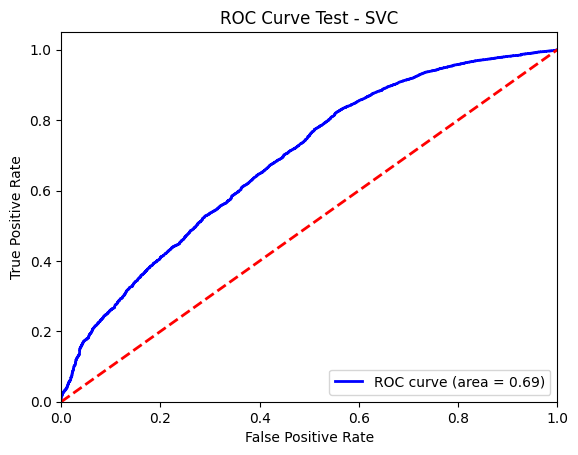

In [202]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svc)
roc_auc = auc(fpr, tpr)
print(f"SVC Test AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test - SVC')
plt.legend(loc="lower right")
plt.show()

###Train

In [203]:
x_test_pred = svc.predict(X_train)
x_test_prob = svc.decision_function(X_train)

accuracy_test = accuracy_score(y_train, x_test_pred)
print(f"SVC Train Accuracy: {accuracy_test:.4f}")

precision_test = precision_score(y_train, x_test_pred, average='weighted')
print(f"SVC Train Precision: {precision_test:.4f}")

recall_test = recall_score(y_train, x_test_pred, average='weighted')
print(f"SVC Train Recall: {recall_test:.4f}")

f1_test = f1_score(y_train, x_test_pred, average='weighted')
print(f"SVC Train F1 Score: {f1_test:.4f}")

conf_matrix_test = confusion_matrix(y_train, x_test_pred)
print(f"SVC Train Confusion Matrix:\n{conf_matrix_test}")

SVC Train Accuracy: 0.6679
SVC Train Precision: 0.6698
SVC Train Recall: 0.6679
SVC Train F1 Score: 0.6062
SVC Train Confusion Matrix:
[[49564  2977]
 [24737  6169]]


SVC Train AUC: 0.6974


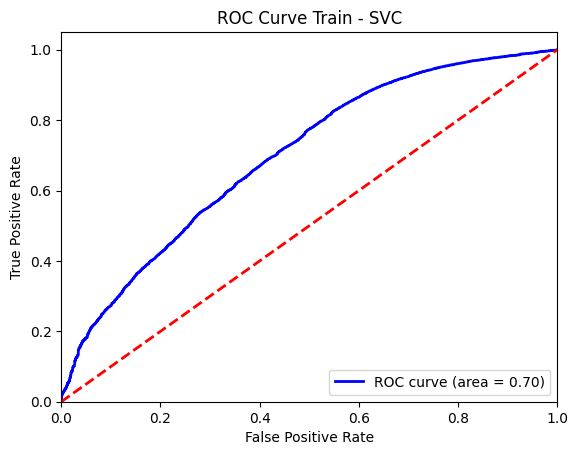

In [204]:
fpr_train, tpr_train, _ = roc_curve(y_train, x_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
print(f"SVC Train AUC: {roc_auc_train:.4f}")

# ROC Curve çizimi
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train - SVC')
plt.legend(loc="lower right")
plt.show()

##Önemli Öznitelikleri Belirleme

###XGBoost

<Figure size 1400x1000 with 0 Axes>

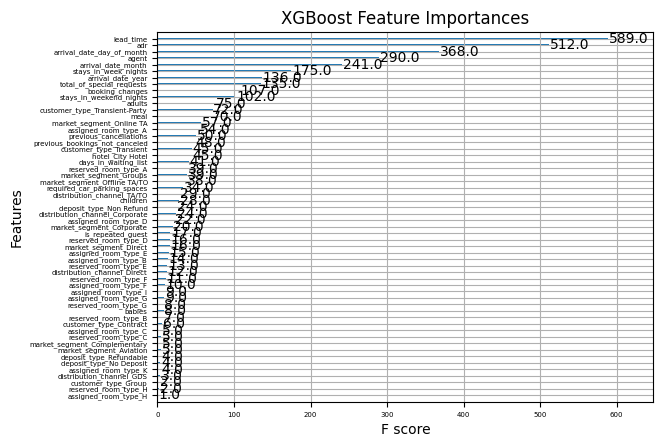

In [205]:
import xgboost as xgb
from xgboost import plot_importance
xgboost_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)
plt.figure(figsize=(14, 10))
plot_importance(xgboost_model, importance_type='weight', title='XGBoost Feature Importances')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()

####Seçilen Öznitelikler İle Yeniden Eğitme ve Performans Karşılaştırması (XGBoost)

In [206]:
important = [
    'lead_time',
    'adr',
    'agent',
    'arrival_date_day_of_month',
    'stays_in_week_nights',
    'arrival_date_year',
    'total_of_special_requests',
    'stays_in_weekend_nights',
    'arrival_date_month',
    'booking_changes'
]
new_X = X[important]

In [207]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(new_X, y, test_size=0.3, shuffle=True)
xgb = XGBClassifier()
xgb.fit(X_train_n, y_train_n)
y_pred_xgb_n = xgb.predict(X_test_n)
y_pred_prob_xgb_n = xgb.predict_proba(X_test_n)[:, 1]

Test

In [208]:
accuracy_xgb = accuracy_score(y_test_n, y_pred_xgb_n)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")

# Precision
precision_xgb = precision_score(y_test_n, y_pred_xgb_n, average='weighted')
print(f"XGBoost Test Precision: {precision_xgb:.4f}")

# Recall
recall_xgb = recall_score(y_test_n, y_pred_xgb_n, average='weighted')
print(f"XGBoost Test Recall: {recall_xgb:.4f}")

# F1 Score
f1_xgb = f1_score(y_test_n, y_pred_xgb_n, average='weighted')
print(f"XGBoost Test F1 Score: {f1_xgb:.4f}")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_n, y_pred_xgb_n)
print(f"XGBoost Test Confusion Matrix:\n{conf_matrix_xgb}")
roc_auc_test = roc_auc_score(y_test_n, y_pred_prob_xgb_n)
print(f"XGBoost Test AUC:\n{roc_auc_test}")

XGBoost Test Accuracy: 0.8270
XGBoost Test Precision: 0.8260
XGBoost Test Recall: 0.8270
XGBoost Test F1 Score: 0.8236
XGBoost Test Confusion Matrix:
[[20424  2084]
 [ 4102  9153]]
XGBoost Test AUC:
0.8874763184079668


Train

In [209]:
xgb = XGBClassifier()
xgb.fit(X_train_n, y_train_n)
x_pred_xgb_n = xgb.predict(X_train_n)
x_pred_prob_xgb_n = xgb.predict_proba(X_train_n)[:, 1]

In [210]:
accuracy_xgb = accuracy_score(y_train_n, x_pred_xgb_n)
print(f"XGBoost Train Accuracy: {accuracy_xgb:.4f}")

# Precision
precision_xgb = precision_score(y_train_n, x_pred_xgb_n, average='weighted')
print(f"XGBoost Train Precision: {precision_xgb:.4f}")

# Recall
recall_xgb = recall_score(y_train_n, x_pred_xgb_n, average='weighted')
print(f"XGBoost Train Recall: {recall_xgb:.4f}")

# F1 Score
f1_xgb = f1_score(y_train_n, x_pred_xgb_n, average='weighted')
print(f"XGBoost Train F1 Score: {f1_xgb:.4f}")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_train_n, x_pred_xgb_n)
print(f"XGBoost Train Confusion Matrix:\n{conf_matrix_xgb}")

roc_auc_train = roc_auc_score(y_train_n, x_pred_prob_xgb_n)
print(f"XGBoost Train AUC:\n{roc_auc_train}")

XGBoost Train Accuracy: 0.8438
XGBoost Train Precision: 0.8437
XGBoost Train Recall: 0.8438
XGBoost Train F1 Score: 0.8407
XGBoost Train Confusion Matrix:
[[48373  4130]
 [ 8903 22041]]
XGBoost Train AUC:
0.9133692932866535


###Random Forest

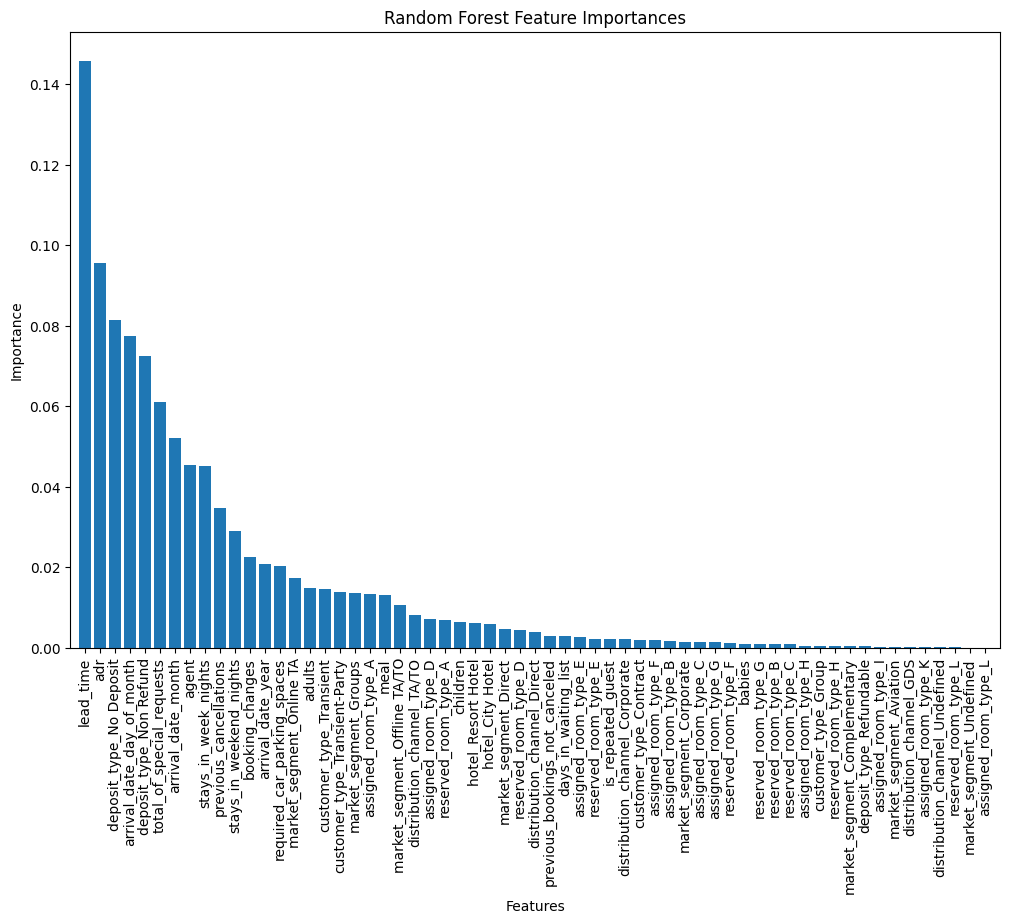

In [211]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances_rf = rf.feature_importances_
features = X_train.columns
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), features[indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [212]:
important = [
    'lead_time',
    'adr',
    'agent',
    'deposit_type_No Deposit',
    'deposit_type_Non Refund',
    'arrival_date_day_of_month',
    'stays_in_week_nights',
    'total_of_special_requests',
    'previous_cancellations',
    'arrival_date_month'
]
new_X = X[important]

In [213]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(new_X, y, test_size=0.3, shuffle=True)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_n, y_train_n)
y_pred_rf_n = rf.predict(X_test_n)
y_pred_prob_rf_n = rf.predict_proba(X_test_n)[:, 1]

In [214]:
accuracy_xgb = accuracy_score(y_test_n, y_pred_rf_n)
print(f"RF Test Accuracy: {accuracy_xgb:.4f}")

# Precision
precision_xgb = precision_score(y_test_n, y_pred_rf_n, average='weighted')
print(f"RF Test Precision: {precision_xgb:.4f}")

# Recall
recall_xgb = recall_score(y_test_n, y_pred_rf_n, average='weighted')
print(f"RF Test Recall: {recall_xgb:.4f}")

# F1 Score
f1_xgb = f1_score(y_test_n, y_pred_rf_n, average='weighted')
print(f"RF Test F1 Score: {f1_xgb:.4f}")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_n, y_pred_rf_n)
print(f"RF Test Confusion Matrix:\n{conf_matrix_xgb}")

roc_auc_test = roc_auc_score(y_test_n, y_pred_prob_rf_n)
print(f"RF Test AUC:\n{roc_auc_test}")

RF Test Accuracy: 0.8521
RF Test Precision: 0.8522
RF Test Recall: 0.8521
RF Test F1 Score: 0.8495
RF Test Confusion Matrix:
[[20699  1688]
 [ 3600  9776]]
RF Test AUC:
0.9112765870080529


Train

In [215]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_n, y_train_n)
x_pred_rf_n = rf.predict(X_train_n)
x_pred_prob_rf_n = rf.predict_proba(X_train_n)[:, 1]

In [216]:
accuracy_xgb = accuracy_score(y_train_n, x_pred_rf_n)
print(f"RF Train Accuracy: {accuracy_xgb:.4f}")

# Precision
precision_xgb = precision_score(y_train_n, x_pred_rf_n, average='weighted')
print(f"RF Train Precision: {precision_xgb:.4f}")

# Recall
recall_xgb = recall_score(y_train_n, x_pred_rf_n, average='weighted')
print(f"RF Train Recall: {recall_xgb:.4f}")

# F1 Score
f1_xgb = f1_score(y_train_n, x_pred_rf_n, average='weighted')
print(f"RF Train F1 Score: {f1_xgb:.4f}")

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_train_n, x_pred_rf_n)
print(f"RF Train Confusion Matrix:\n{conf_matrix_xgb}")

roc_auc_train = roc_auc_score(y_train_n, x_pred_prob_rf_n)
print(f"RF Train AUC:\n{roc_auc_train}")

RF Train Accuracy: 0.9888
RF Train Precision: 0.9888
RF Train Recall: 0.9888
RF Train F1 Score: 0.9888
RF Train Confusion Matrix:
[[52334   290]
 [  642 30181]]
RF Train AUC:
0.998560350212411


## Hiperparametre Ayarlama

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest modelini tanımlıyoruz
rf = RandomForestClassifier()

# Hiperparametrelerin aralıklarını tanımlıyoruz
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Ağaç sayısı
    'max_features': ['auto', 'sqrt', 'log2'],  # Her ağacın rastgele seçeceği özelliklerin sayısı
    'max_depth': [None, 10, 20, 30, 40, 50],  # Ağaçların derinliği
    'min_samples_split': [2, 5, 10],  # İç düğümlerde bölünmek için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],  # Yaprak düğümlerdeki minimum örnek sayısı
    'bootstrap': [True, False]  # Bootstrap örneklemesi kullanılıp kullanılmayacağı
}

# GridSearchCV nesnesini tanımlıyoruz
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

# GridSearchCV'yi eğitim verileri ile fit ediyoruz
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru alıyoruz
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En İyi Parametreler:")
print(best_params)
print("En İyi Skor:")
print(best_score)

In [219]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomForest modelini tanımlıyoruz
rfh = RandomForestClassifier(random_state=42)


# Random Search ayarları
random_search = RandomizedSearchCV(estimator=rfh,
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Hiperparametre kombinasyonu sayısı
                                   scoring='accuracy',  # Performans metriği
                                   cv=2,  # K-Fold cross-validation
                                   verbose=2,  # İlerlemeyi göster
                                   random_state=42,
                                   n_jobs=-1)  # Paralel çalıştırma

# Random Search'ü çalıştır
random_search.fit(X_train, y_train)
print(best_score)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


84 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

NameError: name 'best_score' is not defined

In [220]:
print("En İyi Parametreler:")
print(random_search.best_params_)

# En iyi modelin performansını kontrol edelim
best_rf = random_search.best_estimator_
best_score = random_search.best_score_

print(f"Best Random Forest Accuracy: {best_score:.4f}")

En İyi Parametreler:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best Random Forest Accuracy: 0.8608


In [221]:
y_pred = best_rf.predict(X_test)

# Performans metriklerini hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")

Random Forest Accuracy: 0.8718
Random Forest Precision: 0.8723
Random Forest Recall: 0.8718
Random Forest F1 Score: 0.8696


Random Forest AUC: 0.9353


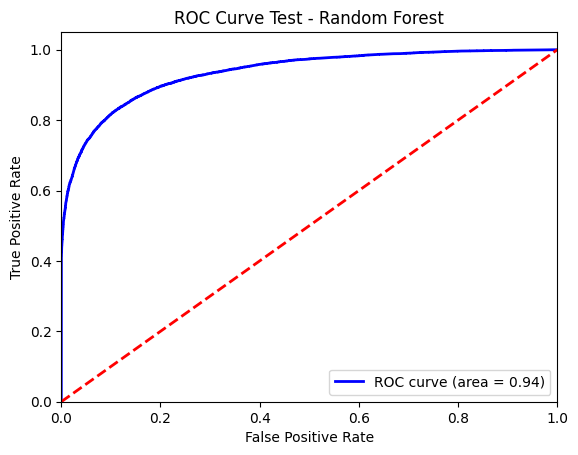

In [222]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"Random Forest AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [223]:
x_pred = best_rf.predict(X_train)
accuracy = accuracy_score(y_train, x_pred)
precision = precision_score(y_train, x_pred, average='weighted')
recall = recall_score(y_train, x_pred, average='weighted')
f1 = f1_score(y_train, x_pred, average='weighted')

print(f"Random Forest Train Accuracy: {accuracy:.4f}")
print(f"Random Forest Train Precision: {precision:.4f}")
print(f"Random Forest Train Recall: {recall:.4f}")
print(f"Random Forest Train F1 Score: {f1:.4f}")

Random Forest Train Accuracy: 0.9716
Random Forest Train Precision: 0.9716
Random Forest Train Recall: 0.9716
Random Forest Train F1 Score: 0.9715


Random Forest AUC: 0.9967


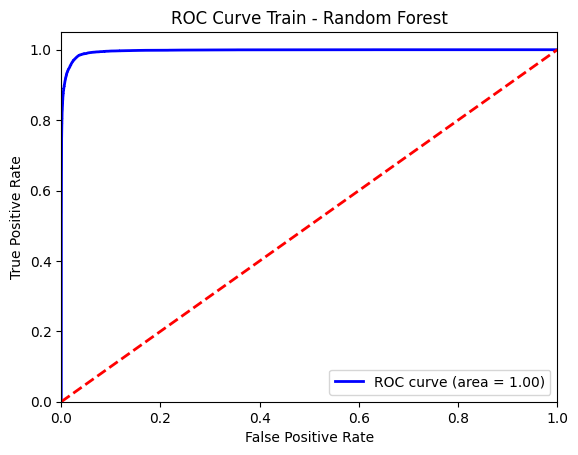

In [224]:
x_pred_proba = best_rf.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, x_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"Random Forest AUC: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train - Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost modeli tanımla
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Hiperparametre aralıklarını belirle
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}


# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve sonuçları yazdır
print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi Doğruluk Skoru: {grid_search.best_score_:.4f}")